Make figures for statistics of the Gaussian components. This includes:

1. Line width as function of galactocentric radius
2. Peak temperature with Rgal
3. Number of components with Rgal
4. ...

In [1]:
from astropy.io import fits
import astropy.units as u
import astropy.constants as c
import os
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import Projection
from scipy import ndimage as nd
from astropy.stats import histogram as astro_hist

from galaxies import Galaxy

osjoin = os.path.join

repo_path = os.path.expanduser("~/ownCloud/project_code/ThickHIFitting/")

figures_path_png = osjoin(repo_path, "figures/png")
figures_path_pdf = osjoin(repo_path, "figures/pdf")


def save_figure(fig, plot_name, **kwargs):
    fig.savefig(f"{figures_path_pdf}/{plot_name}.pdf", **kwargs)
    fig.savefig(f"{figures_path_png}/{plot_name}.png", **kwargs)


paths_script = os.path.join(repo_path, "paths.py")
exec(compile(open(paths_script, "rb").read(), paths_script, 'exec'))

plotstyle_script = os.path.join(repo_path, "plotting_styles.py")
exec(compile(open(plotstyle_script, "rb").read(), plotstyle_script, 'exec'))


In [2]:
m31_multigauss_name = fifteenA_HI_BCtaper_04kms_data_wEBHIS_path("individ_multigaussian_gausspy_fits_neighbcheck2_nomw.fits")
m31_multigauss_hdu = fits.open(m31_multigauss_name)

m31_ngauss = np.isfinite(m31_multigauss_hdu[0].data).sum(0) // 3
m31_maxgauss = np.nanmax(m31_ngauss)

m31_amps = m31_multigauss_hdu[0].data[::3][:m31_maxgauss] * u.K
m31_cents = m31_multigauss_hdu[0].data[1::3][:m31_maxgauss] * u.m / u.s
m31_lwidths = m31_multigauss_hdu[0].data[2::3][:m31_maxgauss] * u.m / u.s

m31_cents = m31_cents.to(u.km / u.s)
m31_lwidths = m31_lwidths.to(u.km / u.s)

# Blend and distinct separations

m31_multigauss_name_distinct = fifteenA_HI_BCtaper_04kms_data_wEBHIS_path("individ_multigaussian_gausspy_fits_neighbcheck2_noMW_distinct.fits")
m31_multigauss_hdu_distinct = fits.open(m31_multigauss_name_distinct)

m31_ngauss_distinct = np.isfinite(m31_multigauss_hdu_distinct[0].data).sum(0) // 3
m31_maxgauss_distinct = np.nanmax(m31_ngauss_distinct)

m31_amps_distinct = m31_multigauss_hdu_distinct[0].data[::3][:m31_maxgauss_distinct] * u.K
m31_cents_distinct = m31_multigauss_hdu_distinct[0].data[1::3][:m31_maxgauss_distinct] * u.m / u.s
m31_lwidths_distinct = m31_multigauss_hdu_distinct[0].data[2::3][:m31_maxgauss_distinct] * u.m / u.s

m31_amps_distinct_uncert = m31_multigauss_hdu_distinct[1].data[::3][:m31_maxgauss_distinct] * u.K
m31_cents_distinct_uncert = m31_multigauss_hdu_distinct[1].data[1::3][:m31_maxgauss_distinct] * u.m / u.s
m31_lwidths_distinct_uncert = m31_multigauss_hdu_distinct[1].data[2::3][:m31_maxgauss_distinct] * u.m / u.s

m31_cents_distinct = m31_cents_distinct.to(u.km / u.s)
m31_lwidths_distinct = m31_lwidths_distinct.to(u.km / u.s)

m31_cents_distinct_uncert = m31_cents_distinct_uncert.to(u.km / u.s)
m31_lwidths_distinct_uncert = m31_lwidths_distinct_uncert.to(u.km / u.s)

m31_multigauss_name_blend = fifteenA_HI_BCtaper_04kms_data_wEBHIS_path("individ_multigaussian_gausspy_fits_neighbcheck2_noMW_blend.fits")
m31_multigauss_hdu_blend = fits.open(m31_multigauss_name_blend)

m31_ngauss_blend = np.isfinite(m31_multigauss_hdu_blend[0].data).sum(0) // 3
m31_maxgauss_blend = np.nanmax(m31_ngauss_blend)

m31_amps_blend = m31_multigauss_hdu_blend[0].data[::3][:m31_maxgauss_blend] * u.K
m31_cents_blend = m31_multigauss_hdu_blend[0].data[1::3][:m31_maxgauss_blend] * u.m / u.s
m31_lwidths_blend = m31_multigauss_hdu_blend[0].data[2::3][:m31_maxgauss_blend] * u.m / u.s

m31_cents_blend = m31_cents_blend.to(u.km / u.s)
m31_lwidths_blend = m31_lwidths_blend.to(u.km / u.s)

gal_m31 = Galaxy('M31')

radii_m31 = gal_m31.radius(header=m31_multigauss_hdu[2].header).to(u.kpc)


In [3]:
m33_multigauss_name = fourteenB_HI_data_wGBT_path("individ_multigaussian_gausspy_fits_neighbcheck2_nomw.fits")
m33_multigauss_hdu = fits.open(m33_multigauss_name)

m33_ngauss = np.isfinite(m33_multigauss_hdu[0].data).sum(0) // 3
m33_maxgauss = np.nanmax(m33_ngauss)

m33_amps = m33_multigauss_hdu[0].data[::3][:m33_maxgauss] * u.K
m33_cents = m33_multigauss_hdu[0].data[1::3][:m33_maxgauss] * u.m / u.s
m33_lwidths = m33_multigauss_hdu[0].data[2::3][:m33_maxgauss] * u.m / u.s

m33_cents = m33_cents.to(u.km / u.s)
m33_lwidths = m33_lwidths.to(u.km / u.s)

# Blend and distinct separations

m33_multigauss_name_distinct = fourteenB_HI_data_wGBT_path("individ_multigaussian_gausspy_fits_neighbcheck2_noMW_distinct.fits")
m33_multigauss_hdu_distinct = fits.open(m33_multigauss_name_distinct)

m33_ngauss_distinct = np.isfinite(m33_multigauss_hdu_distinct[0].data).sum(0) // 3
m33_maxgauss_distinct = np.nanmax(m33_ngauss_distinct)

m33_amps_distinct = m33_multigauss_hdu_distinct[0].data[::3][:m33_maxgauss_distinct] * u.K
m33_cents_distinct = m33_multigauss_hdu_distinct[0].data[1::3][:m33_maxgauss_distinct] * u.m / u.s
m33_lwidths_distinct = m33_multigauss_hdu_distinct[0].data[2::3][:m33_maxgauss_distinct] * u.m / u.s

m33_amps_distinct_uncert = m33_multigauss_hdu_distinct[1].data[::3][:m33_maxgauss_distinct] * u.K
m33_cents_distinct_uncert = m33_multigauss_hdu_distinct[1].data[1::3][:m33_maxgauss_distinct] * u.m / u.s
m33_lwidths_distinct_uncert = m33_multigauss_hdu_distinct[1].data[2::3][:m33_maxgauss_distinct] * u.m / u.s

m33_cents_distinct = m33_cents_distinct.to(u.km / u.s)
m33_lwidths_distinct = m33_lwidths_distinct.to(u.km / u.s)

m33_cents_distinct_uncert = m33_cents_distinct_uncert.to(u.km / u.s)
m33_lwidths_distinct_uncert = m33_lwidths_distinct_uncert.to(u.km / u.s)

m33_multigauss_name_blend = fourteenB_HI_data_wGBT_path("individ_multigaussian_gausspy_fits_neighbcheck2_noMW_blend.fits")
m33_multigauss_hdu_blend = fits.open(m33_multigauss_name_blend)

m33_ngauss_blend = np.isfinite(m33_multigauss_hdu_blend[0].data).sum(0) // 3
m33_maxgauss_blend = np.nanmax(m33_ngauss_blend)

m33_amps_blend = m33_multigauss_hdu_blend[0].data[::3][:m33_maxgauss_blend] * u.K
m33_cents_blend = m33_multigauss_hdu_blend[0].data[1::3][:m33_maxgauss_blend] * u.m / u.s
m33_lwidths_blend = m33_multigauss_hdu_blend[0].data[2::3][:m33_maxgauss_blend] * u.m / u.s

m33_cents_blend = m33_cents_blend.to(u.km / u.s)
m33_lwidths_blend = m33_lwidths_blend.to(u.km / u.s)

gal_m33 = Galaxy('M33')

radii_m33 = gal_m33.radius(header=m33_multigauss_hdu[2].header).to(u.kpc)


In [4]:
print(f"M31 Max comp: {m31_maxgauss}, max distinct: {m31_maxgauss_distinct}, max blend: {m31_maxgauss_blend}")
print(f"M33 Max comp: {m33_maxgauss}, max distinct: {m33_maxgauss_distinct}, max blend: {m33_maxgauss_blend}")

M31 Max comp: 8, max distinct: 6, max blend: 7
M33 Max comp: 6, max distinct: 4, max blend: 6


/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in less


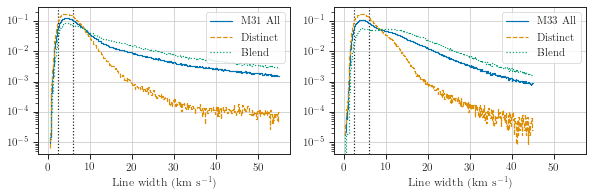

In [5]:
# twocolumn_figure()

twocolumn_twopanel_figure()

cts_lw_m31, bin_edges_lw_m31 = astro_hist(m31_lwidths[np.isfinite(m31_lwidths) &
                                                      (m31_lwidths.value < 55)].value,
                                          bins='knuth', density=True)
bin_centres_lw_m31 = (bin_edges_lw_m31[1:] + bin_edges_lw_m31[:-1]) / 2.

cts_lw_m33, bin_edges_lw_m33 = astro_hist(m33_lwidths[np.isfinite(m33_lwidths) &
                                                      (m33_lwidths.value < 45)].value,
                                          bins='knuth', density=True)
bin_centres_lw_m33 = (bin_edges_lw_m33[1:] + bin_edges_lw_m33[:-1]) / 2.

# Distinct

cts_lw_m31_distinct = astro_hist(m31_lwidths_distinct[np.isfinite(m31_lwidths_distinct) &
                                                      (m31_lwidths_distinct.value < 55)].value,
                                 bins=bin_edges_lw_m31, density=True)[0]

cts_lw_m33_distinct = astro_hist(m33_lwidths_distinct[np.isfinite(m33_lwidths_distinct) &
                                                      (m33_lwidths_distinct.value < 45)].value,
                                 bins=bin_edges_lw_m33, density=True)[0]

# Blend
cts_lw_m31_blend = astro_hist(m31_lwidths_blend[np.isfinite(m31_lwidths_blend) &
                                                (m31_lwidths_blend.value < 55)].value,
                              bins=bin_edges_lw_m31, density=True)[0]

cts_lw_m33_blend = astro_hist(m33_lwidths_blend[np.isfinite(m33_lwidths_blend) &
                                                (m33_lwidths_blend.value < 45)].value,
                              bins=bin_edges_lw_m33, density=True)[0]


fig = plt.figure()
ax = fig.add_subplot(121)

ax.semilogy(bin_centres_lw_m31, cts_lw_m31,
             drawstyle='steps-mid',
             linestyle='-',
             label="M31 All")

ax.semilogy(bin_centres_lw_m31, cts_lw_m31_distinct,
             drawstyle='steps-mid',
             linestyle='--',
             label="Distinct")

ax.semilogy(bin_centres_lw_m31, cts_lw_m31_blend,
             drawstyle='steps-mid',
             linestyle=':',
             label="Blend")

ax2 = fig.add_subplot(122, sharex=ax, sharey=ax)

ax2.semilogy(bin_centres_lw_m33, cts_lw_m33,
             drawstyle='steps-mid',
             linestyle='-',
             label="M33 All")

ax2.semilogy(bin_centres_lw_m33, cts_lw_m33_distinct,
             drawstyle='steps-mid',
             linestyle='--',
             label="Distinct")

ax2.semilogy(bin_centres_lw_m33, cts_lw_m33_blend,
             drawstyle='steps-mid',
             linestyle=':',
             label="Blend")

ax.legend(loc='upper right', frameon=True)
ax2.legend(loc='upper right', frameon=True)

ax.grid()
ax2.grid()

ax.set_xlabel(r"Line width (km s$^{-1})$")
ax2.set_xlabel(r"Line width (km s$^{-1})$")
# plt.ylabel("")


def thermwidth(temp):
    return np.sqrt(c.k_B * temp / (1.4 * c.m_p)).to(u.km / u.s)

ax.axvline(thermwidth(1000 * u.K).value, linestyle=':', color='k', zorder=-1)
ax2.axvline(thermwidth(1000 * u.K).value, linestyle=':', color='k', zorder=-1)

ax.axvline(thermwidth(6000 * u.K).value, linestyle=':', color='k', zorder=-1)
ax2.axvline(thermwidth(6000 * u.K).value, linestyle=':', color='k', zorder=-1)

plt.tight_layout()

plot_name = 'm31_m33_mgauss_lwidth_hist_distinct_blend'

save_figure(fig, plot_name)


Split line widths by Rgal.

/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: Ru

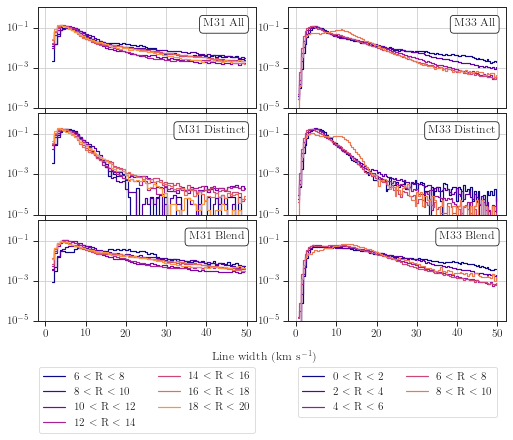

In [6]:
twocolumn_figure()

fig = plt.figure()

# M31

bins_m31 = np.linspace(6, 20, 8) * u.kpc

max_val = 50 * u.km / u.s

ax_m31 = fig.add_subplot(321)
ax_m31_distinct = fig.add_subplot(323, sharex=ax_m31, sharey=ax_m31)
ax_m31_blend = fig.add_subplot(325, sharex=ax_m31, sharey=ax_m31)

for i, (low, high) in enumerate(zip(bins_m31[:-1], bins_m31[1:])):

    bin_locs = np.where(np.logical_and(radii_m31 >= low, radii_m31 < high))

    lwidth_vals = []
    lwidth_distinct_vals = []
    lwidth_blend_vals = []
    
    for j in range(m31_lwidths.shape[0]):
        lwidth_val = m31_lwidths[j][bin_locs].value
        lwidth_vals.append(lwidth_val[np.isfinite(lwidth_val) &
                                      (lwidth_val < max_val.value)])
    for j in range(m31_lwidths_distinct.shape[0]):
        lwidth_val_dist = m31_lwidths_distinct[j][bin_locs].value
        lwidth_distinct_vals.append(lwidth_val_dist[np.isfinite(lwidth_val_dist) &
                                                    (lwidth_val_dist < max_val.value)])
    for j in range(m31_lwidths_blend.shape[0]):
        lwidth_val_blend = m31_lwidths_blend[j][bin_locs].value
        lwidth_blend_vals.append(lwidth_val_blend[np.isfinite(lwidth_val_blend) &
                                                    (lwidth_val_blend < max_val.value)])
        
        
    lwidth_vals = np.hstack(lwidth_vals)
    lwidth_distinct_vals = np.hstack(lwidth_distinct_vals)
    lwidth_blend_vals = np.hstack(lwidth_blend_vals)

    if i == 0:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(lwidth_vals,
                                                  bins='knuth',
                                                  density=True)
    else:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(lwidth_vals,
                                                  bins=bin_edges_lw_rad0,
                                                  density=True)

    if i == 0:
        bin_edges_lw_rad0 = bin_edges_lw_rad
        bin_centres_lw_rad = (bin_edges_lw_rad[1:] + bin_edges_lw_rad[:-1]) / 2.

    ax_m31.semilogy(bin_centres_lw_rad, cts_lw_rad,
                    color=plt.cm.plasma(i / bins_m31.size),
                    drawstyle='steps-mid',
                    linestyle='-',
                    label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_dist = astro_hist(lwidth_distinct_vals,
                                 density=True,
                                 bins=bin_edges_lw_rad0)[0]
    ax_m31_distinct.semilogy(bin_centres_lw_rad, cts_lw_rad_dist,
                             color=plt.cm.plasma(i / bins_m31.size),
                             drawstyle='steps-mid',
                             linestyle='-',
                             label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_blend = astro_hist(lwidth_blend_vals,
                                 density=True,
                                 bins=bin_edges_lw_rad0)[0]
    ax_m31_blend.semilogy(bin_centres_lw_rad, cts_lw_rad_blend,
                             color=plt.cm.plasma(i / bins_m31.size),
                             drawstyle='steps-mid',
                             linestyle='-',
                             label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))
    


# M33
bins_m33 = np.linspace(0, 10, 6) * u.kpc


ax_m33 = fig.add_subplot(322, sharex=ax_m31, sharey=ax_m31)
ax_m33_distinct = fig.add_subplot(324, sharex=ax_m31, sharey=ax_m31)
ax_m33_blend = fig.add_subplot(326, sharex=ax_m31, sharey=ax_m31)


max_val = 50 * u.km / u.s

for i, (low, high) in enumerate(zip(bins_m33[:-1], bins_m33[1:])):

    bin_locs = np.where(np.logical_and(radii_m33 >= low, radii_m33 < high))

    lwidth_vals = []
    lwidth_distinct_vals = []
    lwidth_blend_vals = []
    
    for j in range(m33_lwidths.shape[0]):
        lwidth_val = m33_lwidths[j][bin_locs].value
        lwidth_vals.append(lwidth_val[np.isfinite(lwidth_val) &
                                      (lwidth_val < max_val.value)])
    for j in range(m33_lwidths_distinct.shape[0]):
        lwidth_val_dist = m33_lwidths_distinct[j][bin_locs].value
        lwidth_distinct_vals.append(lwidth_val_dist[np.isfinite(lwidth_val_dist) &
                                                    (lwidth_val_dist < max_val.value)])
    for j in range(m33_lwidths_blend.shape[0]):
        lwidth_val_blend = m33_lwidths_blend[j][bin_locs].value
        lwidth_blend_vals.append(lwidth_val_blend[np.isfinite(lwidth_val_blend) &
                                                    (lwidth_val_blend < max_val.value)])
        
        
    lwidth_vals = np.hstack(lwidth_vals)
    lwidth_distinct_vals = np.hstack(lwidth_distinct_vals)
    lwidth_blend_vals = np.hstack(lwidth_blend_vals)

    if i == 0:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(lwidth_vals,
                                                  bins='knuth',
                                                  density=True)
    else:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(lwidth_vals,
                                                  bins=bin_edges_lw_rad0,
                                                  density=True)

    if i == 0:
        bin_edges_lw_rad0 = bin_edges_lw_rad
        bin_centres_lw_rad = (bin_edges_lw_rad[1:] + bin_edges_lw_rad[:-1]) / 2.

    ax_m33.semilogy(bin_centres_lw_rad, cts_lw_rad,
                    color=plt.cm.plasma(i / bins_m33.size),
                    drawstyle='steps-mid',
                    linestyle='-',
                    label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_dist = astro_hist(lwidth_distinct_vals,
                                 density=True,
                                 bins=bin_edges_lw_rad0)[0]
    ax_m33_distinct.semilogy(bin_centres_lw_rad, cts_lw_rad_dist,
                             color=plt.cm.plasma(i / bins_m33.size),
                             drawstyle='steps-mid',
                             linestyle='-',
                             label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_blend = astro_hist(lwidth_blend_vals,
                                 density=True,
                                 bins=bin_edges_lw_rad0)[0]
    ax_m33_blend.semilogy(bin_centres_lw_rad, cts_lw_rad_blend,
                             color=plt.cm.plasma(i / bins_m33.size),
                             drawstyle='steps-mid',
                             linestyle='-',
                             label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))
    

# ax_m31.legend(frameon=True, loc='upper right', ncol=2)
# ax_m33.legend(frameon=True, loc='upper right', ncol=2)

ax_m31.set_ylim([1e-5, 1.1])

# ax.axvline(0.42, linestyle=':', color='k')
# ax.axvline(5 * 0.42, linestyle=':', color='k')
ax_m31.grid(True)
ax_m31_distinct.grid(True)
ax_m31_blend.grid(True)

ax_m33.grid(True)
ax_m33_distinct.grid(True)
ax_m33_blend.grid(True)

# ax_m33.set_yticklabels([])
# ax_m33_distinct.set_yticklabels([])
# ax_m33_blend.set_yticklabels([])

lg = ax_m31_blend.legend(bbox_to_anchor=(0.5, -0.4), loc='upper center', frameon=True, ncol=2)
lg2 = ax_m33_blend.legend(bbox_to_anchor=(0.5, -0.4), loc='upper center', frameon=True, ncol=2)


bbox_props = dict(boxstyle='round', facecolor='white', alpha=1., edgecolor='k')

ax_m31.text(0.95, 0.8, 'M31 All', transform=ax_m31.transAxes, bbox=bbox_props, horizontalalignment='right')
ax_m33.text(0.95, 0.8, 'M33 All', transform=ax_m33.transAxes, bbox=bbox_props, horizontalalignment='right')

ax_m31_distinct.text(0.95, 0.8, 'M31 Distinct', transform=ax_m31_distinct.transAxes, bbox=bbox_props,
                     horizontalalignment='right')
ax_m33_distinct.text(0.95, 0.8, 'M33 Distinct', transform=ax_m33_distinct.transAxes, bbox=bbox_props,
                     horizontalalignment='right')

ax_m31_blend.text(0.95, 0.8, 'M31 Blend', transform=ax_m31_blend.transAxes, bbox=bbox_props, horizontalalignment='right')
ax_m33_blend.text(0.95, 0.8, 'M33 Blend', transform=ax_m33_blend.transAxes, bbox=bbox_props, horizontalalignment='right')

fig.subplots_adjust(hspace=0.05, wspace=0.15)

fig.text(0.5, 0.04, r'Line width (km s$^{-1}$)', ha='center', va='center')
# fig.text(0.06, 0.5, 'common ylabel', ha='center', va='center', rotation='vertical')

plot_name = 'm31_m33_radialbins_mgauss_lwidth_hist_distinct_blend'

save_figure(fig, plot_name, bbox_extra_artists=(lg, lg2), bbox_inches='tight')


/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in less
/mnt/work2/ekoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py

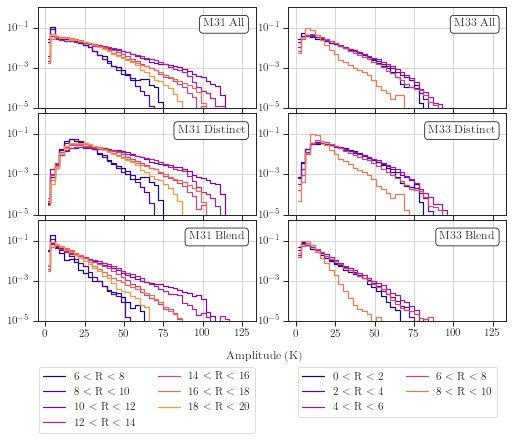

In [94]:
twocolumn_figure()

fig = plt.figure()

# M31

bins_m31 = np.linspace(6, 20, 8) * u.kpc

ax_m31 = fig.add_subplot(321)
ax_m31_distinct = fig.add_subplot(323, sharex=ax_m31, sharey=ax_m31)
ax_m31_blend = fig.add_subplot(325, sharex=ax_m31, sharey=ax_m31)

bins_amp_sp = np.arange(0., 130., 3.)

for i, (low, high) in enumerate(zip(bins_m31[:-1], bins_m31[1:])):

    bin_locs = np.where(np.logical_and(radii_m31 >= low, radii_m31 < high))

    amp_vals = []
    amp_distinct_vals = []
    amp_blend_vals = []
    
    for j in range(m31_amps.shape[0]):
        amp_val = m31_amps[j][bin_locs].value
        amp_vals.append(amp_val[np.isfinite(amp_val)])
    for j in range(m31_amps_distinct.shape[0]):
        amp_val_dist = m31_amps_distinct[j][bin_locs].value
        amp_distinct_vals.append(amp_val_dist[np.isfinite(amp_val_dist)])
    for j in range(m31_amps_blend.shape[0]):
        amp_val_blend = m31_amps_blend[j][bin_locs].value
        amp_blend_vals.append(amp_val_blend[np.isfinite(amp_val_blend)])
        
        
    amp_vals = np.hstack(amp_vals)
    amp_distinct_vals = np.hstack(amp_distinct_vals)
    amp_blend_vals = np.hstack(amp_blend_vals)

    if i == 0:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(amp_vals,
#                                                   bins='knuth',
                                                  bins=bins_amp_sp,
                                                  density=True)
    else:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(amp_vals,
                                                  bins=bin_edges_lw_rad0,
                                                  density=True)

    if i == 0:
        bin_edges_lw_rad0 = bin_edges_lw_rad
        bin_centres_lw_rad = (bin_edges_lw_rad[1:] + bin_edges_lw_rad[:-1]) / 2.

    ax_m31.semilogy(bin_centres_lw_rad, cts_lw_rad,
                    color=plt.cm.plasma(i / bins_m31.size),
                    drawstyle='steps-mid',
                    linestyle='-',
                    label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_dist = astro_hist(amp_distinct_vals,
                                 density=True,
                                 bins=bin_edges_lw_rad0)[0]
    ax_m31_distinct.semilogy(bin_centres_lw_rad, cts_lw_rad_dist,
                             color=plt.cm.plasma(i / bins_m31.size),
                             drawstyle='steps-mid',
                             linestyle='-',
                             label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_blend = astro_hist(amp_blend_vals,
                                 density=True,
                                 bins=bin_edges_lw_rad0)[0]
    ax_m31_blend.semilogy(bin_centres_lw_rad, cts_lw_rad_blend,
                             color=plt.cm.plasma(i / bins_m31.size),
                             drawstyle='steps-mid',
                             linestyle='-',
                             label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))
    


# M33
bins_m33 = np.linspace(0, 10, 6) * u.kpc


ax_m33 = fig.add_subplot(322, sharex=ax_m31, sharey=ax_m31)
ax_m33_distinct = fig.add_subplot(324, sharex=ax_m31, sharey=ax_m31)
ax_m33_blend = fig.add_subplot(326, sharex=ax_m31, sharey=ax_m31)


max_val = 200 * u.K

for i, (low, high) in enumerate(zip(bins_m33[:-1], bins_m33[1:])):

    bin_locs = np.where(np.logical_and(radii_m33 >= low, radii_m33 < high))

    amp_vals = []
    amp_distinct_vals = []
    amp_blend_vals = []
    
    for j in range(m33_amps.shape[0]):
        amp_val = m33_amps[j][bin_locs].value
        amp_vals.append(amp_val[np.isfinite(amp_val) &
                                      (amp_val < max_val.value)])
    for j in range(m33_amps_distinct.shape[0]):
        amp_val_dist = m33_amps_distinct[j][bin_locs].value
        amp_distinct_vals.append(amp_val_dist[np.isfinite(amp_val_dist) &
                                                    (amp_val_dist < max_val.value)])
    for j in range(m33_amps_blend.shape[0]):
        amp_val_blend = m33_amps_blend[j][bin_locs].value
        amp_blend_vals.append(amp_val_blend[np.isfinite(amp_val_blend) &
                                                    (amp_val_blend < max_val.value)])
        
        
    amp_vals = np.hstack(amp_vals)
    amp_distinct_vals = np.hstack(amp_distinct_vals)
    amp_blend_vals = np.hstack(amp_blend_vals)

    if i == 0:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(amp_vals,
#                                                   bins='knuth',
                                                  bins=bins_amp_sp,
                                                  density=True)
    else:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(amp_vals,
                                                  bins=bin_edges_lw_rad0,
                                                  density=True)

    if i == 0:
        bin_edges_lw_rad0 = bin_edges_lw_rad
        bin_centres_lw_rad = (bin_edges_lw_rad[1:] + bin_edges_lw_rad[:-1]) / 2.

    ax_m33.semilogy(bin_centres_lw_rad, cts_lw_rad,
                    color=plt.cm.plasma(i / bins_m33.size),
                    drawstyle='steps-mid',
                    linestyle='-',
                    label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_dist = astro_hist(amp_distinct_vals,
                                 density=True,
                                 bins=bin_edges_lw_rad0)[0]
    ax_m33_distinct.semilogy(bin_centres_lw_rad, cts_lw_rad_dist,
                             color=plt.cm.plasma(i / bins_m33.size),
                             drawstyle='steps-mid',
                             linestyle='-',
                             label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_blend = astro_hist(amp_blend_vals,
                                 density=True,
                                 bins=bin_edges_lw_rad0)[0]
    ax_m33_blend.semilogy(bin_centres_lw_rad, cts_lw_rad_blend,
                             color=plt.cm.plasma(i / bins_m33.size),
                             drawstyle='steps-mid',
                             linestyle='-',
                             label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))
    

# ax_m31.legend(frameon=True, loc='upper right', ncol=2)
# ax_m33.legend(frameon=True, loc='upper right', ncol=2)

ax_m31.set_ylim([1e-5, 1.1])

# ax.axvline(0.42, linestyle=':', color='k')
# ax.axvline(5 * 0.42, linestyle=':', color='k')
ax_m31.grid(True)
ax_m31_distinct.grid(True)
ax_m31_blend.grid(True)

ax_m33.grid(True)
ax_m33_distinct.grid(True)
ax_m33_blend.grid(True)

# ax_m33.set_yticklabels([])
# ax_m33_distinct.set_yticklabels([])
# ax_m33_blend.set_yticklabels([])

lg = ax_m31_blend.legend(bbox_to_anchor=(0.5, -0.4), loc='upper center', frameon=True, ncol=2)
lg2 = ax_m33_blend.legend(bbox_to_anchor=(0.5, -0.4), loc='upper center', frameon=True, ncol=2)


bbox_props = dict(boxstyle='round', facecolor='white', alpha=1., edgecolor='k')

ax_m31.text(0.95, 0.8, 'M31 All', transform=ax_m31.transAxes, bbox=bbox_props, horizontalalignment='right')
ax_m33.text(0.95, 0.8, 'M33 All', transform=ax_m33.transAxes, bbox=bbox_props, horizontalalignment='right')

ax_m31_distinct.text(0.95, 0.8, 'M31 Distinct', transform=ax_m31_distinct.transAxes, bbox=bbox_props,
                     horizontalalignment='right')
ax_m33_distinct.text(0.95, 0.8, 'M33 Distinct', transform=ax_m33_distinct.transAxes, bbox=bbox_props,
                     horizontalalignment='right')

ax_m31_blend.text(0.95, 0.8, 'M31 Blend', transform=ax_m31_blend.transAxes, bbox=bbox_props, horizontalalignment='right')
ax_m33_blend.text(0.95, 0.8, 'M33 Blend', transform=ax_m33_blend.transAxes, bbox=bbox_props, horizontalalignment='right')

fig.subplots_adjust(hspace=0.05, wspace=0.15)

fig.text(0.5, 0.04, r'Amplitude (K)', ha='center', va='center')
# fig.text(0.06, 0.5, 'common ylabel', ha='center', va='center', rotation='vertical')

plot_name = 'm31_m33_radialbins_mgauss_amp_hist_distinct_blend'

save_figure(fig, plot_name, bbox_extra_artists=(lg, lg2), bbox_inches='tight')


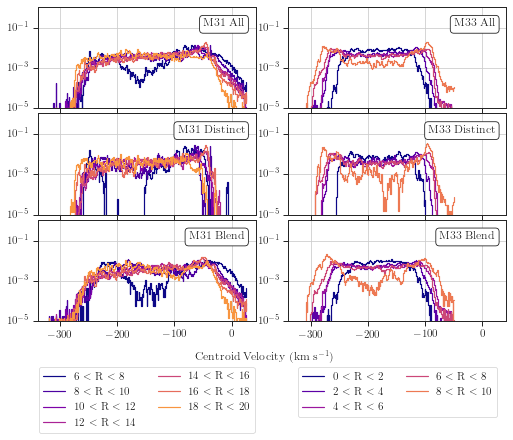

In [97]:
twocolumn_figure()

fig = plt.figure()

# M31

bins_m31 = np.linspace(6, 20, 8) * u.kpc

ax_m31 = fig.add_subplot(321)
ax_m31_distinct = fig.add_subplot(323, sharex=ax_m31, sharey=ax_m31)
ax_m31_blend = fig.add_subplot(325, sharex=ax_m31, sharey=ax_m31)

# bins_cent_m31 = np.arange(np.nanmin(m31_cents.value), np.nanmax(m31_cents.value), 0.42)
bins_cent_m31 = np.arange(np.nanmin(m31_cents.value), np.nanmax(m31_cents.value), 0.84)

for i, (low, high) in enumerate(zip(bins_m31[:-1], bins_m31[1:])):

    bin_locs = np.where(np.logical_and(radii_m31 >= low, radii_m31 < high))

    cent_vals = []
    cent_distinct_vals = []
    cent_blend_vals = []
    
    for j in range(m31_cents.shape[0]):
        cent_val = m31_cents[j][bin_locs].value
        cent_vals.append(cent_val[np.isfinite(cent_val)])
    for j in range(m31_cents_distinct.shape[0]):
        cent_val_dist = m31_cents_distinct[j][bin_locs].value
        cent_distinct_vals.append(cent_val_dist[np.isfinite(cent_val_dist)])
    for j in range(m31_cents_blend.shape[0]):
        cent_val_blend = m31_cents_blend[j][bin_locs].value
        cent_blend_vals.append(cent_val_blend[np.isfinite(cent_val_blend)])
        
        
    cent_vals = np.hstack(cent_vals)
    cent_distinct_vals = np.hstack(cent_distinct_vals)
    cent_blend_vals = np.hstack(cent_blend_vals)

    if i == 0:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(cent_vals,
#                                                   bins='knuth',
                                                  bins=bins_cent_m31,
                                                  density=True)
    else:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(cent_vals,
                                                  bins=bin_edges_lw_rad0,
                                                  density=True)

    if i == 0:
        bin_edges_lw_rad0 = bin_edges_lw_rad
        bin_centres_lw_rad = (bin_edges_lw_rad[1:] + bin_edges_lw_rad[:-1]) / 2.

    ax_m31.semilogy(bin_centres_lw_rad, cts_lw_rad,
                    color=plt.cm.plasma(i / bins_m31.size),
                    drawstyle='steps-mid',
                    linestyle='-',
                    label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_dist = astro_hist(cent_distinct_vals,
                                 density=True,
                                 bins=bin_edges_lw_rad0)[0]
    ax_m31_distinct.semilogy(bin_centres_lw_rad, cts_lw_rad_dist,
                             color=plt.cm.plasma(i / bins_m31.size),
                             drawstyle='steps-mid',
                             linestyle='-',
                             label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_blend = astro_hist(cent_blend_vals,
                                 density=True,
                                 bins=bin_edges_lw_rad0)[0]
    ax_m31_blend.semilogy(bin_centres_lw_rad, cts_lw_rad_blend,
                             color=plt.cm.plasma(i / bins_m31.size),
                             drawstyle='steps-mid',
                             linestyle='-',
                             label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))
    


# M33
bins_m33 = np.linspace(0, 10, 6) * u.kpc


ax_m33 = fig.add_subplot(322, sharex=ax_m31, sharey=ax_m31)
ax_m33_distinct = fig.add_subplot(324, sharex=ax_m31, sharey=ax_m31)
ax_m33_blend = fig.add_subplot(326, sharex=ax_m31, sharey=ax_m31)

# bins_cent_m33 = np.arange(np.nanmin(m33_cents.value), np.nanmax(m33_cents.value), 0.42)
bins_cent_m33 = np.arange(np.nanmin(m33_cents.value), np.nanmax(m33_cents.value), 0.84)

for i, (low, high) in enumerate(zip(bins_m33[:-1], bins_m33[1:])):

    bin_locs = np.where(np.logical_and(radii_m33 >= low, radii_m33 < high))

    cent_vals = []
    cent_distinct_vals = []
    cent_blend_vals = []
    
    for j in range(m33_cents.shape[0]):
        cent_val = m33_cents[j][bin_locs].value
        cent_vals.append(cent_val[np.isfinite(cent_val)])
    for j in range(m33_cents_distinct.shape[0]):
        cent_val_dist = m33_cents_distinct[j][bin_locs].value
        cent_distinct_vals.append(cent_val_dist[np.isfinite(cent_val_dist)])
    for j in range(m33_cents_blend.shape[0]):
        cent_val_blend = m33_cents_blend[j][bin_locs].value
        cent_blend_vals.append(cent_val_blend[np.isfinite(cent_val_blend)])
        
        
    cent_vals = np.hstack(cent_vals)
    cent_distinct_vals = np.hstack(cent_distinct_vals)
    cent_blend_vals = np.hstack(cent_blend_vals)

    if i == 0:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(cent_vals,
#                                                   bins='knuth',
                                                  bins=bins_cent_m33,
                                                  density=True)
    else:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(cent_vals,
                                                  bins=bin_edges_lw_rad0,
                                                  density=True)

    if i == 0:
        bin_edges_lw_rad0 = bin_edges_lw_rad
        bin_centres_lw_rad = (bin_edges_lw_rad[1:] + bin_edges_lw_rad[:-1]) / 2.

    ax_m33.semilogy(bin_centres_lw_rad, cts_lw_rad,
                    color=plt.cm.plasma(i / bins_m33.size),
                    drawstyle='steps-mid',
                    linestyle='-',
                    label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_dist = astro_hist(cent_distinct_vals,
                                 density=True,
                                 bins=bin_edges_lw_rad0)[0]
    ax_m33_distinct.semilogy(bin_centres_lw_rad, cts_lw_rad_dist,
                             color=plt.cm.plasma(i / bins_m33.size),
                             drawstyle='steps-mid',
                             linestyle='-',
                             label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_blend = astro_hist(cent_blend_vals,
                                 density=True,
                                 bins=bin_edges_lw_rad0)[0]
    ax_m33_blend.semilogy(bin_centres_lw_rad, cts_lw_rad_blend,
                             color=plt.cm.plasma(i / bins_m33.size),
                             drawstyle='steps-mid',
                             linestyle='-',
                             label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))
    

# ax_m31.legend(frameon=True, loc='upper right', ncol=2)
# ax_m33.legend(frameon=True, loc='upper right', ncol=2)

ax_m31.set_ylim([1e-5, 1.1])

# ax.axvline(0.42, linestyle=':', color='k')
# ax.axvline(5 * 0.42, linestyle=':', color='k')
ax_m31.grid(True)
ax_m31_distinct.grid(True)
ax_m31_blend.grid(True)

ax_m33.grid(True)
ax_m33_distinct.grid(True)
ax_m33_blend.grid(True)

# ax_m33.set_yticklabels([])
# ax_m33_distinct.set_yticklabels([])
# ax_m33_blend.set_yticklabels([])

lg = ax_m31_blend.legend(bbox_to_anchor=(0.5, -0.4), loc='upper center', frameon=True, ncol=2)
lg2 = ax_m33_blend.legend(bbox_to_anchor=(0.5, -0.4), loc='upper center', frameon=True, ncol=2)


bbox_props = dict(boxstyle='round', facecolor='white', alpha=1., edgecolor='k')

ax_m31.text(0.95, 0.8, 'M31 All', transform=ax_m31.transAxes, bbox=bbox_props, horizontalalignment='right')
ax_m33.text(0.95, 0.8, 'M33 All', transform=ax_m33.transAxes, bbox=bbox_props, horizontalalignment='right')

ax_m31_distinct.text(0.95, 0.8, 'M31 Distinct', transform=ax_m31_distinct.transAxes, bbox=bbox_props,
                     horizontalalignment='right')
ax_m33_distinct.text(0.95, 0.8, 'M33 Distinct', transform=ax_m33_distinct.transAxes, bbox=bbox_props,
                     horizontalalignment='right')

ax_m31_blend.text(0.95, 0.8, 'M31 Blend', transform=ax_m31_blend.transAxes, bbox=bbox_props, horizontalalignment='right')
ax_m33_blend.text(0.95, 0.8, 'M33 Blend', transform=ax_m33_blend.transAxes, bbox=bbox_props, horizontalalignment='right')

fig.subplots_adjust(hspace=0.05, wspace=0.15)

fig.text(0.5, 0.04, r'Centroid Velocity (km s$^{-1}$)', ha='center', va='center')
# fig.text(0.06, 0.5, 'common ylabel', ha='center', va='center', rotation='vertical')

plot_name = 'm31_m33_radialbins_mgauss_cent_hist_distinct_blend'

save_figure(fig, plot_name, bbox_extra_artists=(lg, lg2), bbox_inches='tight')


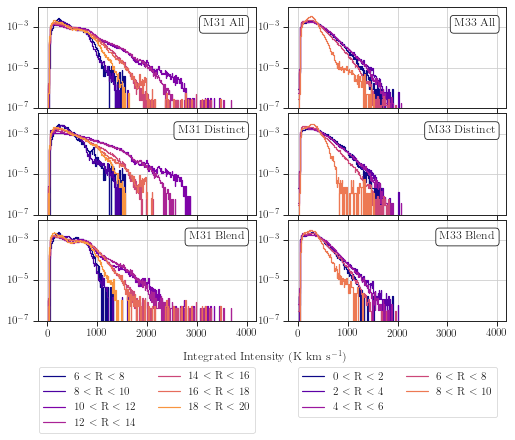

In [100]:
twocolumn_figure()

fig = plt.figure()

# M31

bins_m31 = np.linspace(6, 20, 8) * u.kpc

ax_m31 = fig.add_subplot(321)
ax_m31_distinct = fig.add_subplot(323, sharex=ax_m31, sharey=ax_m31)
ax_m31_blend = fig.add_subplot(325, sharex=ax_m31, sharey=ax_m31)

# bins_intint = np.arange(0, 5500, 10)
bins_intint = np.arange(0, 4000, 10)

for i, (low, high) in enumerate(zip(bins_m31[:-1], bins_m31[1:])):

    bin_locs = np.where(np.logical_and(radii_m31 >= low, radii_m31 < high))

    intint_vals = []
    intint_distinct_vals = []
    intint_blend_vals = []
    
    for j in range(m31_amps.shape[0]):
        amp_val = m31_amps[j][bin_locs].value
        lwidth_val = m31_lwidths[j][bin_locs].value

        intint_val = np.sqrt(2 * np.pi) * amp_val * lwidth_val

        intint_vals.append(intint_val[np.isfinite(amp_val) &
                                      np.isfinite(lwidth_val)])

    for j in range(m31_amps_distinct.shape[0]):

        amp_val_dist = m31_amps_distinct[j][bin_locs].value
        lwidth_val_dist = m31_lwidths_distinct[j][bin_locs].value

        intint_val_dist = np.sqrt(2 * np.pi) * amp_val_dist * lwidth_val_dist

        intint_distinct_vals.append(intint_val_dist[np.isfinite(amp_val_dist) &
                                                    np.isfinite(lwidth_val_dist)])

    for j in range(m31_amps_blend.shape[0]):

        amp_val_blend = m31_amps_blend[j][bin_locs].value
        lwidth_val_blend = m31_lwidths_blend[j][bin_locs].value

        intint_val_blend = np.sqrt(2 * np.pi) * amp_val_blend * lwidth_val_blend

        intint_blend_vals.append(intint_val_blend[np.isfinite(amp_val_blend) &
                                                  np.isfinite(lwidth_val_blend)])
        
        
    intint_vals = np.hstack(intint_vals)
    intint_distinct_vals = np.hstack(intint_distinct_vals)
    intint_blend_vals = np.hstack(intint_blend_vals)

    if i == 0:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(intint_vals,
#                                                   bins='knuth',
                                                  bins=bins_intint,
                                                  density=True)
    else:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(intint_vals,
                                                  bins=bin_edges_lw_rad0,
                                                  density=True)

    if i == 0:
        bin_edges_lw_rad0 = bin_edges_lw_rad
        bin_centres_lw_rad = (bin_edges_lw_rad[1:] + bin_edges_lw_rad[:-1]) / 2.

    ax_m31.semilogy(bin_centres_lw_rad, cts_lw_rad,
                    color=plt.cm.plasma(i / bins_m31.size),
                    drawstyle='steps-mid',
                    linestyle='-',
                    label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_dist = astro_hist(intint_distinct_vals,
                                 density=True,
                                 bins=bin_edges_lw_rad0)[0]
    ax_m31_distinct.semilogy(bin_centres_lw_rad, cts_lw_rad_dist,
                             color=plt.cm.plasma(i / bins_m31.size),
                             drawstyle='steps-mid',
                             linestyle='-',
                             label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_blend = astro_hist(intint_blend_vals,
                                  density=True,
                                  bins=bin_edges_lw_rad0)[0]
    ax_m31_blend.semilogy(bin_centres_lw_rad, cts_lw_rad_blend,
                          color=plt.cm.plasma(i / bins_m31.size),
                          drawstyle='steps-mid',
                          linestyle='-',
                          label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))
    


# M33
bins_m33 = np.linspace(0, 10, 6) * u.kpc

ax_m33 = fig.add_subplot(322, sharex=ax_m31, sharey=ax_m31)
ax_m33_distinct = fig.add_subplot(324, sharex=ax_m31, sharey=ax_m31)
ax_m33_blend = fig.add_subplot(326, sharex=ax_m31, sharey=ax_m31)

for i, (low, high) in enumerate(zip(bins_m33[:-1], bins_m33[1:])):

    bin_locs = np.where(np.logical_and(radii_m33 >= low, radii_m33 < high))

    intint_vals = []
    intint_distinct_vals = []
    intint_blend_vals = []
    
    for j in range(m33_amps.shape[0]):
        amp_val = m33_amps[j][bin_locs].value
        lwidth_val = m33_lwidths[j][bin_locs].value

        intint_val = np.sqrt(2 * np.pi) * amp_val * lwidth_val

        intint_vals.append(intint_val[np.isfinite(amp_val) &
                                      np.isfinite(lwidth_val)])

    for j in range(m33_amps_distinct.shape[0]):

        amp_val_dist = m33_amps_distinct[j][bin_locs].value
        lwidth_val_dist = m33_lwidths_distinct[j][bin_locs].value

        intint_val_dist = np.sqrt(2 * np.pi) * amp_val_dist * lwidth_val_dist

        intint_distinct_vals.append(intint_val_dist[np.isfinite(amp_val_dist) &
                                                    np.isfinite(lwidth_val_dist)])

    for j in range(m33_amps_blend.shape[0]):

        amp_val_blend = m33_amps_blend[j][bin_locs].value
        lwidth_val_blend = m33_lwidths_blend[j][bin_locs].value

        intint_val_blend = np.sqrt(2 * np.pi) * amp_val_blend * lwidth_val_blend

        intint_blend_vals.append(intint_val_blend[np.isfinite(amp_val_blend) &
                                                  np.isfinite(lwidth_val_blend)])
        
        
    intint_vals = np.hstack(intint_vals)
    intint_distinct_vals = np.hstack(intint_distinct_vals)
    intint_blend_vals = np.hstack(intint_blend_vals)

    if i == 0:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(intint_vals,
#                                                   bins='knuth',
                                                  bins=bins_intint,
                                                  density=True)
    else:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(intint_vals,
                                                  bins=bin_edges_lw_rad0,
                                                  density=True)

    if i == 0:
        bin_edges_lw_rad0 = bin_edges_lw_rad
        bin_centres_lw_rad = (bin_edges_lw_rad[1:] + bin_edges_lw_rad[:-1]) / 2.

    ax_m33.semilogy(bin_centres_lw_rad, cts_lw_rad,
                    color=plt.cm.plasma(i / bins_m33.size),
                    drawstyle='steps-mid',
                    linestyle='-',
                    label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_dist = astro_hist(intint_distinct_vals,
                                 density=True,
                                 bins=bin_edges_lw_rad0)[0]
    ax_m33_distinct.semilogy(bin_centres_lw_rad, cts_lw_rad_dist,
                             color=plt.cm.plasma(i / bins_m33.size),
                             drawstyle='steps-mid',
                             linestyle='-',
                             label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_blend = astro_hist(intint_blend_vals,
                                  density=True,
                                  bins=bin_edges_lw_rad0)[0]
    ax_m33_blend.semilogy(bin_centres_lw_rad, cts_lw_rad_blend,
                          color=plt.cm.plasma(i / bins_m33.size),
                          drawstyle='steps-mid',
                          linestyle='-',
                          label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))
    
ax_m31.set_ylim([1e-7, 1e-2])

# ax.axvline(0.42, linestyle=':', color='k')
# ax.axvline(5 * 0.42, linestyle=':', color='k')
ax_m31.grid(True)
ax_m31_distinct.grid(True)
ax_m31_blend.grid(True)

ax_m33.grid(True)
ax_m33_distinct.grid(True)
ax_m33_blend.grid(True)

# ax_m33.set_yticklabels([])
# ax_m33_distinct.set_yticklabels([])
# ax_m33_blend.set_yticklabels([])

lg = ax_m31_blend.legend(bbox_to_anchor=(0.5, -0.4), loc='upper center', frameon=True, ncol=2)
lg2 = ax_m33_blend.legend(bbox_to_anchor=(0.5, -0.4), loc='upper center', frameon=True, ncol=2)


bbox_props = dict(boxstyle='round', facecolor='white', alpha=1., edgecolor='k')

ax_m31.text(0.95, 0.8, 'M31 All', transform=ax_m31.transAxes, bbox=bbox_props, horizontalalignment='right')
ax_m33.text(0.95, 0.8, 'M33 All', transform=ax_m33.transAxes, bbox=bbox_props, horizontalalignment='right')

ax_m31_distinct.text(0.95, 0.8, 'M31 Distinct', transform=ax_m31_distinct.transAxes, bbox=bbox_props,
                     horizontalalignment='right')
ax_m33_distinct.text(0.95, 0.8, 'M33 Distinct', transform=ax_m33_distinct.transAxes, bbox=bbox_props,
                     horizontalalignment='right')

ax_m31_blend.text(0.95, 0.8, 'M31 Blend', transform=ax_m31_blend.transAxes, bbox=bbox_props, horizontalalignment='right')
ax_m33_blend.text(0.95, 0.8, 'M33 Blend', transform=ax_m33_blend.transAxes, bbox=bbox_props, horizontalalignment='right')

fig.subplots_adjust(hspace=0.05, wspace=0.15)

fig.text(0.5, 0.04, r'Integrated Intensity (K km s$^{-1}$)', ha='center', va='center')
# fig.text(0.06, 0.5, 'common ylabel', ha='center', va='center', rotation='vertical')

plot_name = 'm31_m33_radialbins_mgauss_intint_hist_distinct_blend'

save_figure(fig, plot_name, bbox_extra_artists=(lg, lg2), bbox_inches='tight')

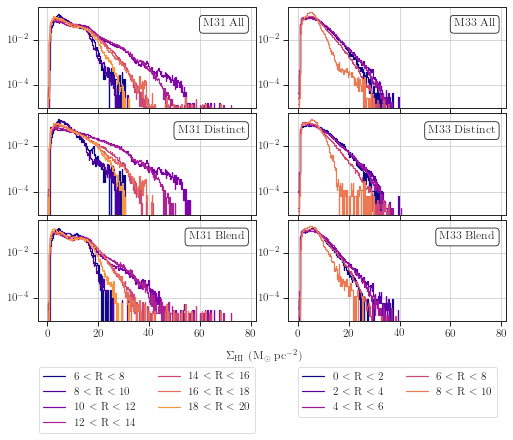

In [101]:
twocolumn_figure()

fig = plt.figure()

# M31

bins_m31 = np.linspace(6, 20, 8) * u.kpc

bins_intint = np.arange(0, 4000, 10) * 0.0196

ax_m31 = fig.add_subplot(321)
ax_m31_distinct = fig.add_subplot(323, sharex=ax_m31, sharey=ax_m31)
ax_m31_blend = fig.add_subplot(325, sharex=ax_m31, sharey=ax_m31)

for i, (low, high) in enumerate(zip(bins_m31[:-1], bins_m31[1:])):

    bin_locs = np.where(np.logical_and(radii_m31 >= low, radii_m31 < high))

    intint_vals = []
    intint_distinct_vals = []
    intint_blend_vals = []
    
    for j in range(m31_amps.shape[0]):
        amp_val = m31_amps[j][bin_locs].value
        lwidth_val = m31_lwidths[j][bin_locs].value

        intint_val = np.sqrt(2 * np.pi) * amp_val * lwidth_val

        intint_vals.append(intint_val[np.isfinite(amp_val) &
                                      np.isfinite(lwidth_val)])

    for j in range(m31_amps_distinct.shape[0]):

        amp_val_dist = m31_amps_distinct[j][bin_locs].value
        lwidth_val_dist = m31_lwidths_distinct[j][bin_locs].value

        intint_val_dist = np.sqrt(2 * np.pi) * amp_val_dist * lwidth_val_dist

        intint_distinct_vals.append(intint_val_dist[np.isfinite(amp_val_dist) &
                                                    np.isfinite(lwidth_val_dist)])

    for j in range(m31_amps_blend.shape[0]):

        amp_val_blend = m31_amps_blend[j][bin_locs].value
        lwidth_val_blend = m31_lwidths_blend[j][bin_locs].value

        intint_val_blend = np.sqrt(2 * np.pi) * amp_val_blend * lwidth_val_blend

        intint_blend_vals.append(intint_val_blend[np.isfinite(amp_val_blend) &
                                                  np.isfinite(lwidth_val_blend)])
        
        
    intint_vals = np.hstack(intint_vals) * 0.0196
    intint_distinct_vals = np.hstack(intint_distinct_vals) * 0.0196
    intint_blend_vals = np.hstack(intint_blend_vals) * 0.0196

    if i == 0:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(intint_vals,
#                                                   bins='knuth',
                                                  bins=bins_intint,
                                                  density=True)
    else:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(intint_vals,
                                                  bins=bin_edges_lw_rad0,
                                                  density=True)

    if i == 0:
        bin_edges_lw_rad0 = bin_edges_lw_rad
        bin_centres_lw_rad = (bin_edges_lw_rad[1:] + bin_edges_lw_rad[:-1]) / 2.

    ax_m31.semilogy(bin_centres_lw_rad, cts_lw_rad,
                    color=plt.cm.plasma(i / bins_m31.size),
                    drawstyle='steps-mid',
                    linestyle='-',
                    label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_dist = astro_hist(intint_distinct_vals,
                                 density=True,
                                 bins=bin_edges_lw_rad0)[0]
    ax_m31_distinct.semilogy(bin_centres_lw_rad, cts_lw_rad_dist,
                             color=plt.cm.plasma(i / bins_m31.size),
                             drawstyle='steps-mid',
                             linestyle='-',
                             label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_blend = astro_hist(intint_blend_vals,
                                  density=True,
                                  bins=bin_edges_lw_rad0)[0]
    ax_m31_blend.semilogy(bin_centres_lw_rad, cts_lw_rad_blend,
                          color=plt.cm.plasma(i / bins_m31.size),
                          drawstyle='steps-mid',
                          linestyle='-',
                          label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))
    


# M33
bins_m33 = np.linspace(0, 10, 6) * u.kpc

ax_m33 = fig.add_subplot(322, sharex=ax_m31, sharey=ax_m31)
ax_m33_distinct = fig.add_subplot(324, sharex=ax_m31, sharey=ax_m31)
ax_m33_blend = fig.add_subplot(326, sharex=ax_m31, sharey=ax_m31)

for i, (low, high) in enumerate(zip(bins_m33[:-1], bins_m33[1:])):

    bin_locs = np.where(np.logical_and(radii_m33 >= low, radii_m33 < high))

    intint_vals = []
    intint_distinct_vals = []
    intint_blend_vals = []
    
    for j in range(m33_amps.shape[0]):
        amp_val = m33_amps[j][bin_locs].value
        lwidth_val = m33_lwidths[j][bin_locs].value

        intint_val = np.sqrt(2 * np.pi) * amp_val * lwidth_val

        intint_vals.append(intint_val[np.isfinite(amp_val) &
                                      np.isfinite(lwidth_val)])

    for j in range(m33_amps_distinct.shape[0]):

        amp_val_dist = m33_amps_distinct[j][bin_locs].value
        lwidth_val_dist = m33_lwidths_distinct[j][bin_locs].value

        intint_val_dist = np.sqrt(2 * np.pi) * amp_val_dist * lwidth_val_dist

        intint_distinct_vals.append(intint_val_dist[np.isfinite(amp_val_dist) &
                                                    np.isfinite(lwidth_val_dist)])

    for j in range(m33_amps_blend.shape[0]):

        amp_val_blend = m33_amps_blend[j][bin_locs].value
        lwidth_val_blend = m33_lwidths_blend[j][bin_locs].value

        intint_val_blend = np.sqrt(2 * np.pi) * amp_val_blend * lwidth_val_blend

        intint_blend_vals.append(intint_val_blend[np.isfinite(amp_val_blend) &
                                                  np.isfinite(lwidth_val_blend)])
        
        
    intint_vals = np.hstack(intint_vals) * 0.0196
    intint_distinct_vals = np.hstack(intint_distinct_vals) * 0.0196
    intint_blend_vals = np.hstack(intint_blend_vals) * 0.0196

    if i == 0:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(intint_vals,
#                                                   bins='knuth',
                                                  bins=bins_intint,
                                                  density=True)
    else:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(intint_vals,
                                                  bins=bin_edges_lw_rad0,
                                                  density=True)

    if i == 0:
        bin_edges_lw_rad0 = bin_edges_lw_rad
        bin_centres_lw_rad = (bin_edges_lw_rad[1:] + bin_edges_lw_rad[:-1]) / 2.

    ax_m33.semilogy(bin_centres_lw_rad, cts_lw_rad,
                    color=plt.cm.plasma(i / bins_m33.size),
                    drawstyle='steps-mid',
                    linestyle='-',
                    label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_dist = astro_hist(intint_distinct_vals,
                                 density=True,
                                 bins=bin_edges_lw_rad0)[0]
    ax_m33_distinct.semilogy(bin_centres_lw_rad, cts_lw_rad_dist,
                             color=plt.cm.plasma(i / bins_m33.size),
                             drawstyle='steps-mid',
                             linestyle='-',
                             label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_blend = astro_hist(intint_blend_vals,
                                  density=True,
                                  bins=bin_edges_lw_rad0)[0]
    ax_m33_blend.semilogy(bin_centres_lw_rad, cts_lw_rad_blend,
                          color=plt.cm.plasma(i / bins_m33.size),
                          drawstyle='steps-mid',
                          linestyle='-',
                          label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))
    
# ax_m31.set_ylim([1e-7, 1e-2])

# ax.axvline(0.42, linestyle=':', color='k')
# ax.axvline(5 * 0.42, linestyle=':', color='k')
ax_m31.grid(True)
ax_m31_distinct.grid(True)
ax_m31_blend.grid(True)

ax_m33.grid(True)
ax_m33_distinct.grid(True)
ax_m33_blend.grid(True)

# ax_m33.set_yticklabels([])
# ax_m33_distinct.set_yticklabels([])
# ax_m33_blend.set_yticklabels([])

lg = ax_m31_blend.legend(bbox_to_anchor=(0.5, -0.4), loc='upper center', frameon=True, ncol=2)
lg2 = ax_m33_blend.legend(bbox_to_anchor=(0.5, -0.4), loc='upper center', frameon=True, ncol=2)


bbox_props = dict(boxstyle='round', facecolor='white', alpha=1., edgecolor='k')

ax_m31.text(0.95, 0.8, 'M31 All', transform=ax_m31.transAxes, bbox=bbox_props, horizontalalignment='right')
ax_m33.text(0.95, 0.8, 'M33 All', transform=ax_m33.transAxes, bbox=bbox_props, horizontalalignment='right')

ax_m31_distinct.text(0.95, 0.8, 'M31 Distinct', transform=ax_m31_distinct.transAxes, bbox=bbox_props,
                     horizontalalignment='right')
ax_m33_distinct.text(0.95, 0.8, 'M33 Distinct', transform=ax_m33_distinct.transAxes, bbox=bbox_props,
                     horizontalalignment='right')

ax_m31_blend.text(0.95, 0.8, 'M31 Blend', transform=ax_m31_blend.transAxes, bbox=bbox_props, horizontalalignment='right')
ax_m33_blend.text(0.95, 0.8, 'M33 Blend', transform=ax_m33_blend.transAxes, bbox=bbox_props, horizontalalignment='right')

fig.subplots_adjust(hspace=0.05, wspace=0.15)

fig.text(0.5, 0.04, r'$\Sigma_{\rm HI}$ (M$_\odot$ pc$^{-2}$)', ha='center', va='center')
# fig.text(0.06, 0.5, 'common ylabel', ha='center', va='center', rotation='vertical')

plot_name = 'm31_m33_radialbins_mgauss_surfdens_hist_distinct_blend'

save_figure(fig, plot_name, bbox_extra_artists=(lg, lg2), bbox_inches='tight')

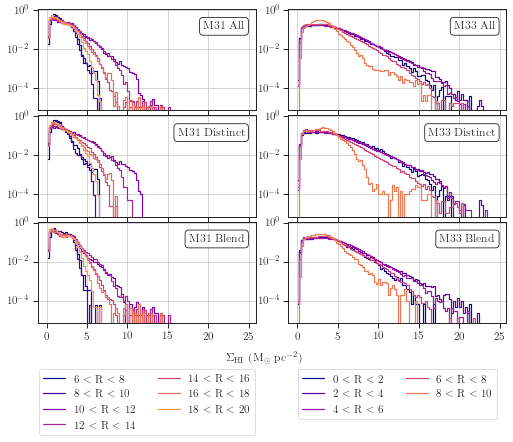

In [107]:
# Same but with inclincation correction:
# are the distribution shapes consistent on the low-end after the correction?
# Or are we going from discs to blobs with the decomposition?

twocolumn_figure()

fig = plt.figure()

# M31

bins_m31 = np.linspace(6, 20, 8) * u.kpc

# bins_intint = np.arange(0, 4000, 10) * 0.0196
bins_intint = np.arange(0, 25, 0.25)

ax_m31 = fig.add_subplot(321)
ax_m31_distinct = fig.add_subplot(323, sharex=ax_m31, sharey=ax_m31)
ax_m31_blend = fig.add_subplot(325, sharex=ax_m31, sharey=ax_m31)

for i, (low, high) in enumerate(zip(bins_m31[:-1], bins_m31[1:])):

    bin_locs = np.where(np.logical_and(radii_m31 >= low, radii_m31 < high))

    intint_vals = []
    intint_distinct_vals = []
    intint_blend_vals = []
    
    for j in range(m31_amps.shape[0]):
        amp_val = m31_amps[j][bin_locs].value
        lwidth_val = m31_lwidths[j][bin_locs].value

        intint_val = np.sqrt(2 * np.pi) * amp_val * lwidth_val * np.cos(78 * u.deg).value

        intint_vals.append(intint_val[np.isfinite(amp_val) &
                                      np.isfinite(lwidth_val)])

    for j in range(m31_amps_distinct.shape[0]):

        amp_val_dist = m31_amps_distinct[j][bin_locs].value
        lwidth_val_dist = m31_lwidths_distinct[j][bin_locs].value

        intint_val_dist = np.sqrt(2 * np.pi) * amp_val_dist * lwidth_val_dist * np.cos(78 * u.deg).value

        intint_distinct_vals.append(intint_val_dist[np.isfinite(amp_val_dist) &
                                                    np.isfinite(lwidth_val_dist)])

    for j in range(m31_amps_blend.shape[0]):

        amp_val_blend = m31_amps_blend[j][bin_locs].value
        lwidth_val_blend = m31_lwidths_blend[j][bin_locs].value

        intint_val_blend = np.sqrt(2 * np.pi) * amp_val_blend * lwidth_val_blend * np.cos(78 * u.deg).value

        intint_blend_vals.append(intint_val_blend[np.isfinite(amp_val_blend) &
                                                  np.isfinite(lwidth_val_blend)])
        
        
    intint_vals = np.hstack(intint_vals) * 0.0196
    intint_distinct_vals = np.hstack(intint_distinct_vals) * 0.0196
    intint_blend_vals = np.hstack(intint_blend_vals) * 0.0196

    if i == 0:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(intint_vals,
#                                                   bins='knuth',
                                                  bins=bins_intint,
                                                  density=True)
    else:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(intint_vals,
                                                  bins=bin_edges_lw_rad0,
                                                  density=True)

    if i == 0:
        bin_edges_lw_rad0 = bin_edges_lw_rad
        bin_centres_lw_rad = (bin_edges_lw_rad[1:] + bin_edges_lw_rad[:-1]) / 2.

    ax_m31.semilogy(bin_centres_lw_rad, cts_lw_rad,
                    color=plt.cm.plasma(i / bins_m31.size),
                    drawstyle='steps-mid',
                    linestyle='-',
                    label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_dist = astro_hist(intint_distinct_vals,
                                 density=True,
                                 bins=bin_edges_lw_rad0)[0]
    ax_m31_distinct.semilogy(bin_centres_lw_rad, cts_lw_rad_dist,
                             color=plt.cm.plasma(i / bins_m31.size),
                             drawstyle='steps-mid',
                             linestyle='-',
                             label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_blend = astro_hist(intint_blend_vals,
                                  density=True,
                                  bins=bin_edges_lw_rad0)[0]
    ax_m31_blend.semilogy(bin_centres_lw_rad, cts_lw_rad_blend,
                          color=plt.cm.plasma(i / bins_m31.size),
                          drawstyle='steps-mid',
                          linestyle='-',
                          label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))
    


# M33
bins_m33 = np.linspace(0, 10, 6) * u.kpc

ax_m33 = fig.add_subplot(322, sharex=ax_m31, sharey=ax_m31)
ax_m33_distinct = fig.add_subplot(324, sharex=ax_m31, sharey=ax_m31)
ax_m33_blend = fig.add_subplot(326, sharex=ax_m31, sharey=ax_m31)

for i, (low, high) in enumerate(zip(bins_m33[:-1], bins_m33[1:])):

    bin_locs = np.where(np.logical_and(radii_m33 >= low, radii_m33 < high))

    intint_vals = []
    intint_distinct_vals = []
    intint_blend_vals = []
    
    for j in range(m33_amps.shape[0]):
        amp_val = m33_amps[j][bin_locs].value
        lwidth_val = m33_lwidths[j][bin_locs].value

        intint_val = np.sqrt(2 * np.pi) * amp_val * lwidth_val * np.cos(55 * u.deg).value

        intint_vals.append(intint_val[np.isfinite(amp_val) &
                                      np.isfinite(lwidth_val)])

    for j in range(m33_amps_distinct.shape[0]):

        amp_val_dist = m33_amps_distinct[j][bin_locs].value
        lwidth_val_dist = m33_lwidths_distinct[j][bin_locs].value

        intint_val_dist = np.sqrt(2 * np.pi) * amp_val_dist * lwidth_val_dist * np.cos(55 * u.deg).value

        intint_distinct_vals.append(intint_val_dist[np.isfinite(amp_val_dist) &
                                                    np.isfinite(lwidth_val_dist)])

    for j in range(m33_amps_blend.shape[0]):

        amp_val_blend = m33_amps_blend[j][bin_locs].value
        lwidth_val_blend = m33_lwidths_blend[j][bin_locs].value

        intint_val_blend = np.sqrt(2 * np.pi) * amp_val_blend * lwidth_val_blend * np.cos(55 * u.deg).value

        intint_blend_vals.append(intint_val_blend[np.isfinite(amp_val_blend) &
                                                  np.isfinite(lwidth_val_blend)])
        
        
    intint_vals = np.hstack(intint_vals) * 0.0196
    intint_distinct_vals = np.hstack(intint_distinct_vals) * 0.0196
    intint_blend_vals = np.hstack(intint_blend_vals) * 0.0196

    if i == 0:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(intint_vals,
#                                                   bins='knuth',
                                                  bins=bins_intint,
                                                  density=True)
    else:
        cts_lw_rad, bin_edges_lw_rad = astro_hist(intint_vals,
                                                  bins=bin_edges_lw_rad0,
                                                  density=True)

    if i == 0:
        bin_edges_lw_rad0 = bin_edges_lw_rad
        bin_centres_lw_rad = (bin_edges_lw_rad[1:] + bin_edges_lw_rad[:-1]) / 2.

    ax_m33.semilogy(bin_centres_lw_rad, cts_lw_rad,
                    color=plt.cm.plasma(i / bins_m33.size),
                    drawstyle='steps-mid',
                    linestyle='-',
                    label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_dist = astro_hist(intint_distinct_vals,
                                 density=True,
                                 bins=bin_edges_lw_rad0)[0]
    ax_m33_distinct.semilogy(bin_centres_lw_rad, cts_lw_rad_dist,
                             color=plt.cm.plasma(i / bins_m33.size),
                             drawstyle='steps-mid',
                             linestyle='-',
                             label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))

    cts_lw_rad_blend = astro_hist(intint_blend_vals,
                                  density=True,
                                  bins=bin_edges_lw_rad0)[0]
    ax_m33_blend.semilogy(bin_centres_lw_rad, cts_lw_rad_blend,
                          color=plt.cm.plasma(i / bins_m33.size),
                          drawstyle='steps-mid',
                          linestyle='-',
                          label="{0} $<$ R $<$ {1}".format(int(low.value), int(high.value)))
    
# ax_m31.set_ylim([1e-7, 1e-2])

# ax.axvline(0.42, linestyle=':', color='k')
# ax.axvline(5 * 0.42, linestyle=':', color='k')
ax_m31.grid(True)
ax_m31_distinct.grid(True)
ax_m31_blend.grid(True)

ax_m33.grid(True)
ax_m33_distinct.grid(True)
ax_m33_blend.grid(True)

# ax_m33.set_yticklabels([])
# ax_m33_distinct.set_yticklabels([])
# ax_m33_blend.set_yticklabels([])

lg = ax_m31_blend.legend(bbox_to_anchor=(0.5, -0.4), loc='upper center', frameon=True, ncol=2)
lg2 = ax_m33_blend.legend(bbox_to_anchor=(0.5, -0.4), loc='upper center', frameon=True, ncol=2)


bbox_props = dict(boxstyle='round', facecolor='white', alpha=1., edgecolor='k')

ax_m31.text(0.95, 0.8, 'M31 All', transform=ax_m31.transAxes, bbox=bbox_props, horizontalalignment='right')
ax_m33.text(0.95, 0.8, 'M33 All', transform=ax_m33.transAxes, bbox=bbox_props, horizontalalignment='right')

ax_m31_distinct.text(0.95, 0.8, 'M31 Distinct', transform=ax_m31_distinct.transAxes, bbox=bbox_props,
                     horizontalalignment='right')
ax_m33_distinct.text(0.95, 0.8, 'M33 Distinct', transform=ax_m33_distinct.transAxes, bbox=bbox_props,
                     horizontalalignment='right')

ax_m31_blend.text(0.95, 0.8, 'M31 Blend', transform=ax_m31_blend.transAxes, bbox=bbox_props, horizontalalignment='right')
ax_m33_blend.text(0.95, 0.8, 'M33 Blend', transform=ax_m33_blend.transAxes, bbox=bbox_props, horizontalalignment='right')

fig.subplots_adjust(hspace=0.05, wspace=0.15)

fig.text(0.5, 0.04, r'$\Sigma_{\rm HI}$ (M$_\odot$ pc$^{-2}$)', ha='center', va='center')
# fig.text(0.06, 0.5, 'common ylabel', ha='center', va='center', rotation='vertical')

plot_name = 'm31_m33_radialbins_mgauss_surfdens_inccorr_hist_distinct_blend'

save_figure(fig, plot_name, bbox_extra_artists=(lg, lg2), bbox_inches='tight')

HA! M31 is anomously narrow if you correct by a single disc inclination correction factor. i.e., these are blobs (IMO).

But this could also be physical: HI is supposed to saturate above some surface density, dependent on the metallicity. And M31 is higher metallicity, so the saturation point would be lower. However, I'm not convinced any of these PDFs show a clear truncation point at the high end for M33, where the radial gradient is well-known. In M31, the differences are far more clear, with the ring being the location of the increased width in the distribution (e.g., [Braun+91](https://ui.adsabs.harvard.edu/abs/1991ApJ...372...54B/abstract))

## LOS integrated intensity for comparison

In [11]:
m33_intint = np.nansum(m33_amps * m33_lwidths * np.sqrt(2 * np.pi), axis=0)
m31_intint = np.nansum(m31_amps * m31_lwidths * np.sqrt(2 * np.pi), axis=0)

m33_intint_distinct = np.nansum(m33_amps_distinct * m33_lwidths_distinct * np.sqrt(2 * np.pi), axis=0)
m31_intint_distinct = np.nansum(m31_amps_distinct * m31_lwidths_distinct * np.sqrt(2 * np.pi), axis=0)

m33_intint_blend = np.nansum(m33_amps_blend * m33_lwidths_blend * np.sqrt(2 * np.pi), axis=0)
m31_intint_blend = np.nansum(m31_amps_blend * m31_lwidths_blend * np.sqrt(2 * np.pi), axis=0)

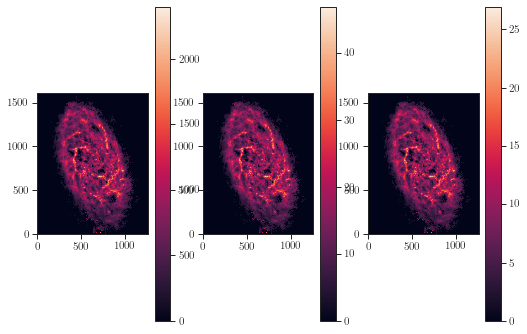

In [12]:

plt.subplot(131)
plt.imshow(m33_intint.value, origin='lower')
plt.colorbar()

plt.subplot(132)
plt.imshow(m33_intint.value * 0.0196, origin='lower')
plt.colorbar()

plt.subplot(133)
plt.imshow(m33_intint.value * 0.0196 * np.cos(55 * u.deg).value, origin='lower')
plt.colorbar()

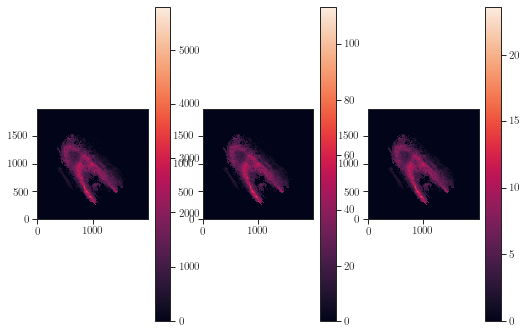

In [13]:

plt.subplot(131)
plt.imshow(m31_intint.value, origin='lower')
plt.colorbar()

plt.subplot(132)
plt.imshow(m31_intint.value * 0.0196, origin='lower')
plt.colorbar()

plt.subplot(133)
plt.imshow(m31_intint.value * 0.0196 * np.cos(78 * u.deg).value, origin='lower')
plt.colorbar()

In [14]:
print(m31_intint.max(), m33_intint.max())
print(m31_intint.max() * np.cos(78 * u.deg),
      m33_intint.max() * np.cos(55 * u.deg))

5792.845481248295 K km / s 2394.2503023004774 K km / s
1204.4002986523506 K km / s 1373.2855561259228 K km / s


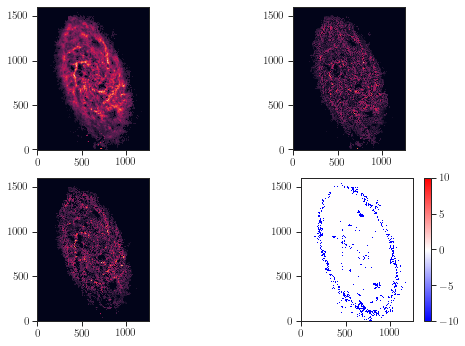

In [15]:
twocolumn_figure()

plt.subplot(221)
plt.imshow(m33_intint.value, origin='lower')
# plt.colorbar()

plt.subplot(222)
plt.imshow(m33_intint_distinct.value, origin='lower')
# plt.colorbar()

plt.subplot(223)
plt.imshow(m33_intint_blend.value, origin='lower')
# plt.colorbar()

plt.subplot(224)
plt.imshow(m33_intint_distinct.value + m33_intint_blend.value - m33_intint.value, origin='lower',
          vmin=-10, vmax=10, cmap='bwr')
plt.colorbar()


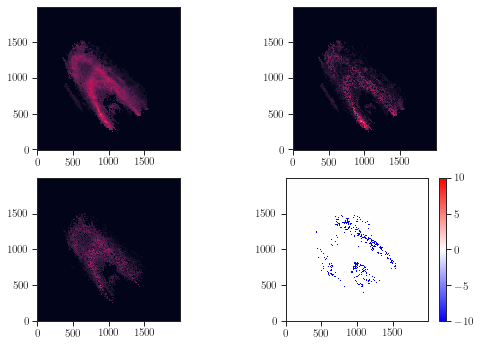

In [16]:
twocolumn_figure()

plt.subplot(221)
plt.imshow(m31_intint.value, origin='lower')
# plt.colorbar()

plt.subplot(222)
plt.imshow(m31_intint_distinct.value, origin='lower')
# plt.colorbar()

plt.subplot(223)
plt.imshow(m31_intint_blend.value, origin='lower')
# plt.colorbar()

plt.subplot(224)
plt.imshow(m31_intint_distinct.value + m31_intint_blend.value - m31_intint.value, origin='lower',
           vmin=-10, vmax=10, cmap='bwr')

plt.colorbar()


## Amplitude and line width joint distribution plots

In [115]:
from corner import corner, hist2d

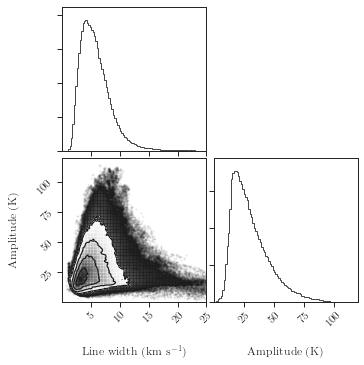

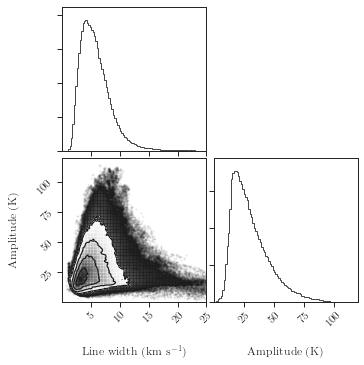

In [116]:
# M31 first

twocolumn_figure()

# fig = plt.figure()

data_m31_corn = np.array([[m31_lwidths_distinct[np.isfinite(m31_lwidths_distinct)]],
                         [m31_amps_distinct[np.isfinite(m31_amps_distinct)]]]).squeeze()

# Focus on the "narrower" line widths (<25 km / s) as the tail is not too meaningful, IMO
corner(data_m31_corn.T, bins=[100, 100], labels=[r"Line width (km s$^{-1}$)", "Amplitude (K)"],
       range=[(0., 25.), (0., 120.)])

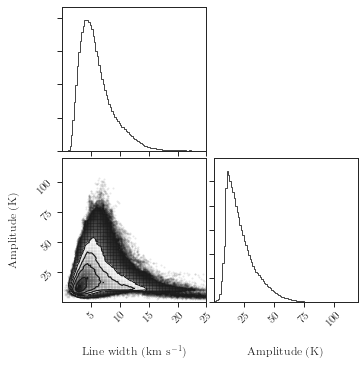

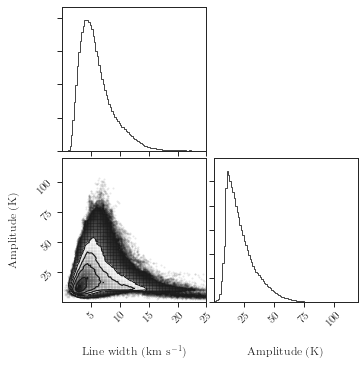

In [117]:
# M33

twocolumn_figure()

# fig = plt.figure()

data_m33_corn = np.array([[m33_lwidths_distinct[np.isfinite(m33_lwidths_distinct)]],
                          [m33_amps_distinct[np.isfinite(m33_amps_distinct)]]]).squeeze()

corner(data_m33_corn.T, bins=[100, 100], labels=[r"Line width (km s$^{-1}$)", "Amplitude (K)"],
       range=[(0., 25.), (0., 120.)])

There are minor differences in the line width tails, but these distributions are actually fairly similar.
Plot the joint distributions to take a closer look.

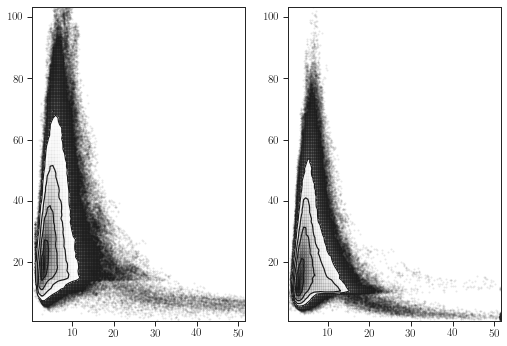

In [155]:
# For now
twocolumn_figure()


fig = plt.figure()

ax = fig.add_subplot(121)

hist2d(data_m31_corn[0], data_m31_corn[1], fig=ax, bins=100)

ax2 = fig.add_subplot(122, sharex=ax, sharey=ax)

hist2d(data_m33_corn[0], data_m33_corn[1], fig=ax2, bins=100)



These are fairly similar. M31 has a population of higher amplitude components. BUT, there doesn't appear to be a systematic offset that you might expect from inclination effects. Try overplotting just the contours to show this:

Text(0.5, 0, 'Line width (km s$^{-1}$)')

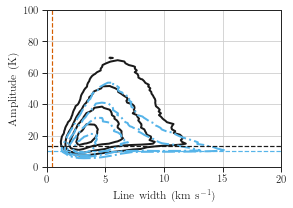

In [160]:
# For now
# twocolumn_figure()
onecolumn_figure()


fig = plt.figure()

ax = fig.add_subplot(111)

hist2d(data_m31_corn[0], data_m31_corn[1], fig=ax, plot_density=False, plot_datapoints=False, color='k',
       bins=100, data_kwargs={'alpha': 0.05}, contour_kwargs={'alpha': 1., 'linewidths': [2]})

hist2d(data_m33_corn[0], data_m33_corn[1], fig=ax, plot_density=False, plot_datapoints=False, color='c',
       bins=100, data_kwargs={'alpha': 0.05}, contour_kwargs={'alpha': 1., 'linewidths': [2],
                                                              'linestyles': ['-.']})

ax.grid(True)

ax.set_xlim([0, 20])
ax.set_ylim([0, 100])

# Put some helpful limits on here

# Linewidth
ax.axvline(0.42, color='r', linestyle='--')

# 5-sigma peak amp.
ax.axhline(2.7 * 5, color='k', linestyle='--')
ax.axhline((2.8 / np.sqrt(2)) * 5, color='c', linestyle='--')

ax.set_ylabel("Amplitude (K)")
ax.set_xlabel(r"Line width (km s$^{-1}$)")
              

The parameters appear somewhat correlated, though with massive intrinsic scatter. My take on this is that weak correlation structure can be used in a model.

The line width distributions are fairly similar, and since the synthetic testing doesn't show a massive dependence except at ~2 the channel width, I think it's reasonable to treat those as about the same for this comparison.

The amplitudes are clearly what differ, and this is what drives the larger surface densities in M31. There could be two differences here:

1. The components in M31 are really brighter, or there's more mass concentrated near the mid-plane (if we think of the bright components mostly near the mid-plane; unsure about that).
2. At least some components in M31 are still unresolved so their line-of-sight depth is still larger and requires an approx. disc inclination correction. This strikes me as reasonable if these distinct components actually lack a large scale warm "background" (meaning a pervasive low-density emitting volume). This may make it hard to use? Need to think about this.

For 2., what would be the clear observational difference in M33 to test this?

The differences are driven by low brightness regions. I suspect this is due to the off-rotation filtering.

## Narrow line width figures

* location of narrow distinct components
* track decline in peak in line width distrib.

In [17]:
# Fit some log-normals to the line width PDFs

from turbustat.statistics import PDF

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.325665
         Iterations: 23
         Function evaluations: 47
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:                -26992.
Model:                     Likelihood   AIC:                         5.399e+04
Method:            Maximum Likelihood   BIC:                         5.401e+04
Date:                Thu, 09 Jul 2020                                         
Time:                        01:56:47                                         
No. Observations:               11606                                         
Df Residuals:                   11604                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

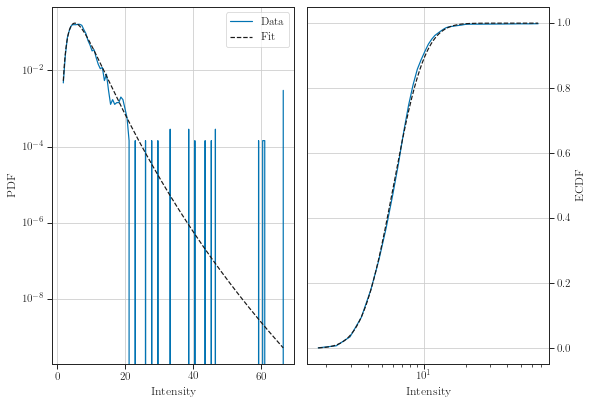

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.107430
         Iterations: 24
         Function evaluations: 49
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:                -16073.
Model:                     Likelihood   AIC:                         3.215e+04
Method:            Maximum Likelihood   BIC:                         3.217e+04
Date:                Thu, 09 Jul 2020                                         
Time:                        01:56:48                                         
No. Observations:                7627                                         
Df Residuals:                    7625                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

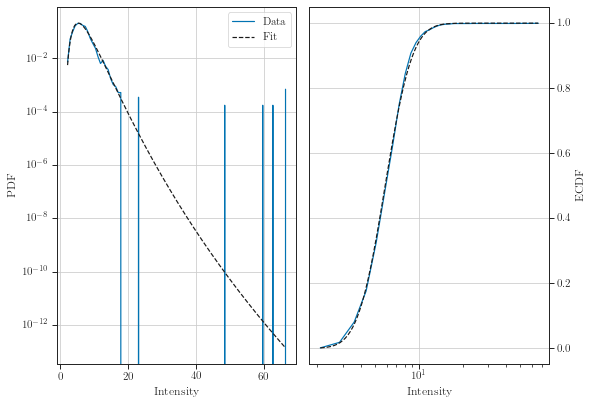

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.494519
         Iterations: 24
         Function evaluations: 48
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:                -32062.
Model:                     Likelihood   AIC:                         6.413e+04
Method:            Maximum Likelihood   BIC:                         6.415e+04
Date:                Thu, 09 Jul 2020                                         
Time:                        01:56:48                                         
No. Observations:               12853                                         
Df Residuals:                   12851                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

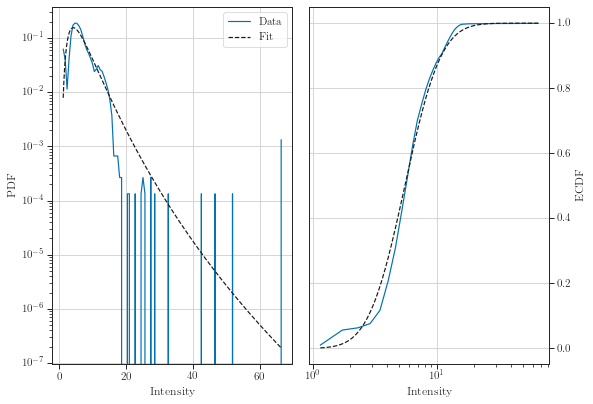

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.406242
         Iterations: 23
         Function evaluations: 47
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:                -73756.
Model:                     Likelihood   AIC:                         1.475e+05
Method:            Maximum Likelihood   BIC:                         1.475e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        01:56:49                                         
No. Observations:               30652                                         
Df Residuals:                   30650                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

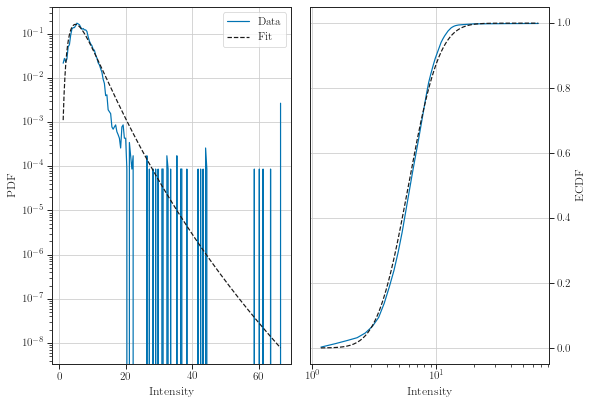

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.444937
         Iterations: 23
         Function evaluations: 47
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -1.2018e+05
Model:                     Likelihood   AIC:                         2.404e+05
Method:            Maximum Likelihood   BIC:                         2.404e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        01:56:50                                         
No. Observations:               49153                                         
Df Residuals:                   49151                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

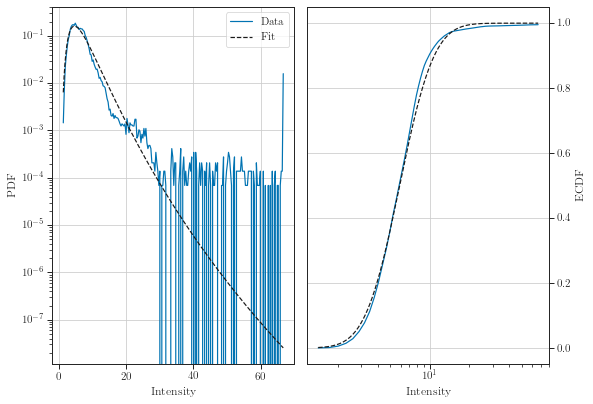

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.447378
         Iterations: 23
         Function evaluations: 47
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -1.5761e+05
Model:                     Likelihood   AIC:                         3.152e+05
Method:            Maximum Likelihood   BIC:                         3.153e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        01:56:51                                         
No. Observations:               64400                                         
Df Residuals:                   64398                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

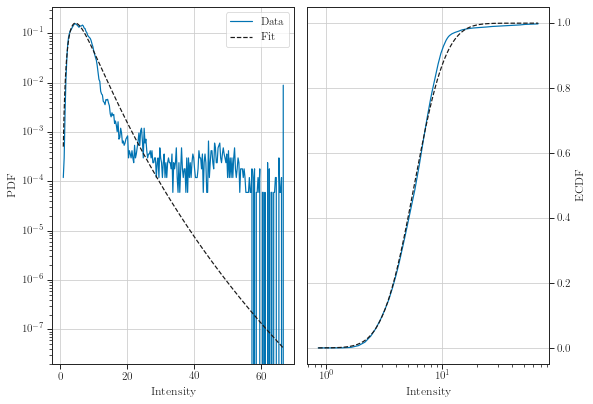

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.403478
         Iterations: 23
         Function evaluations: 47
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -1.9468e+05
Model:                     Likelihood   AIC:                         3.894e+05
Method:            Maximum Likelihood   BIC:                         3.894e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        01:56:52                                         
No. Observations:               81001                                         
Df Residuals:                   80999                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

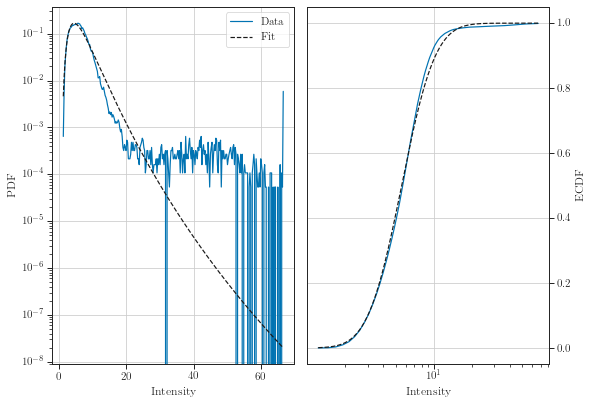

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.358972
         Iterations: 23
         Function evaluations: 47
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -2.0619e+05
Model:                     Likelihood   AIC:                         4.124e+05
Method:            Maximum Likelihood   BIC:                         4.124e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        01:56:53                                         
No. Observations:               87405                                         
Df Residuals:                   87403                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

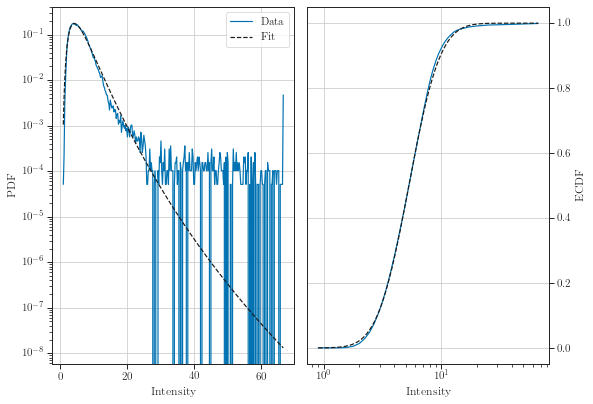

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.411377
         Iterations: 23
         Function evaluations: 47
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -2.0281e+05
Model:                     Likelihood   AIC:                         4.056e+05
Method:            Maximum Likelihood   BIC:                         4.057e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        01:56:54                                         
No. Observations:               84106                                         
Df Residuals:                   84104                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

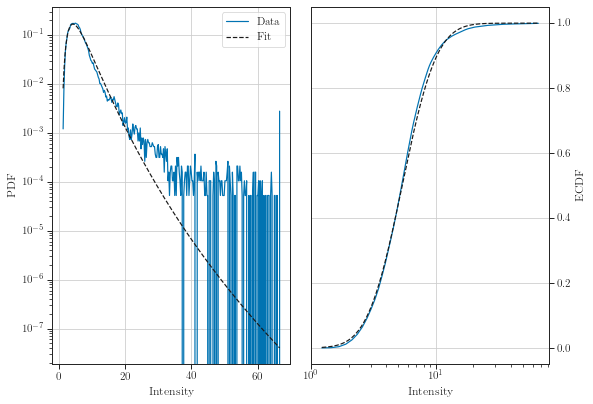

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.302993
         Iterations: 23
         Function evaluations: 47
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -1.9662e+05
Model:                     Likelihood   AIC:                         3.933e+05
Method:            Maximum Likelihood   BIC:                         3.933e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        01:56:55                                         
No. Observations:               85378                                         
Df Residuals:                   85376                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

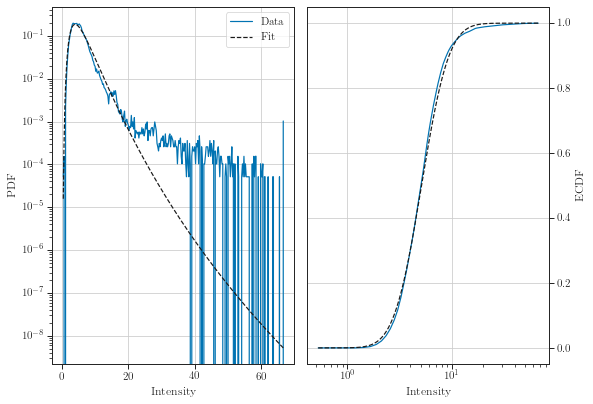

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.222842
         Iterations: 23
         Function evaluations: 47
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -1.7778e+05
Model:                     Likelihood   AIC:                         3.556e+05
Method:            Maximum Likelihood   BIC:                         3.556e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        01:56:57                                         
No. Observations:               79979                                         
Df Residuals:                   79977                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

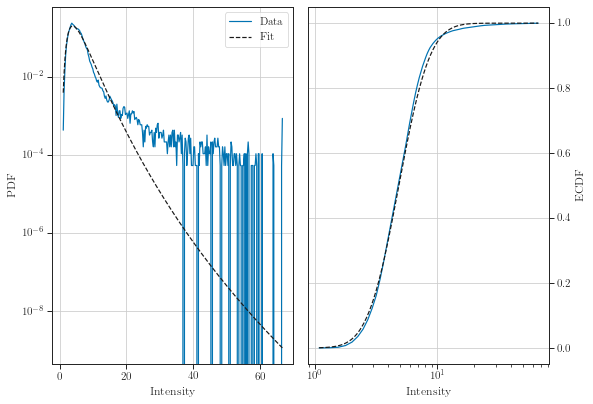

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.383621
         Iterations: 23
         Function evaluations: 47
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -1.6356e+05
Model:                     Likelihood   AIC:                         3.271e+05
Method:            Maximum Likelihood   BIC:                         3.272e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        01:56:57                                         
No. Observations:               68620                                         
Df Residuals:                   68618                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

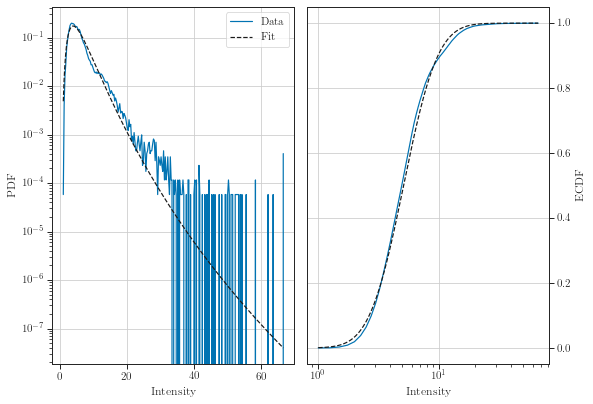

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.364312
         Iterations: 24
         Function evaluations: 48
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -1.1840e+05
Model:                     Likelihood   AIC:                         2.368e+05
Method:            Maximum Likelihood   BIC:                         2.368e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        01:56:58                                         
No. Observations:               50077                                         
Df Residuals:                   50075                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

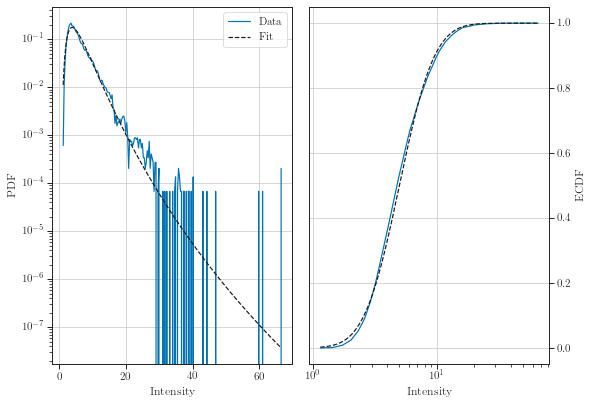

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.236802
         Iterations: 23
         Function evaluations: 47
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:                -75257.
Model:                     Likelihood   AIC:                         1.505e+05
Method:            Maximum Likelihood   BIC:                         1.505e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        01:56:59                                         
No. Observations:               33645                                         
Df Residuals:                   33643                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

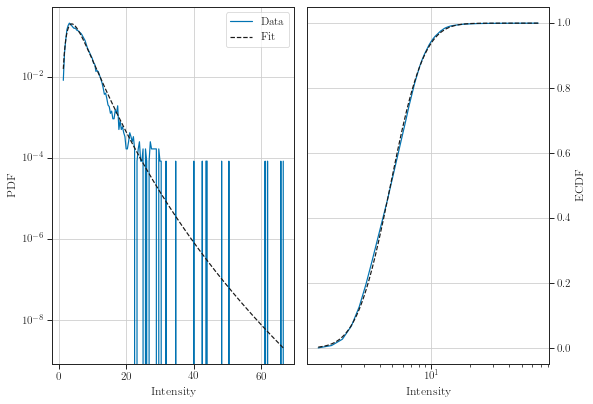

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.325829
         Iterations: 23
         Function evaluations: 47
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:                -28345.
Model:                     Likelihood   AIC:                         5.670e+04
Method:            Maximum Likelihood   BIC:                         5.672e+04
Date:                Thu, 09 Jul 2020                                         
Time:                        01:57:00                                         
No. Observations:               12187                                         
Df Residuals:                   12185                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

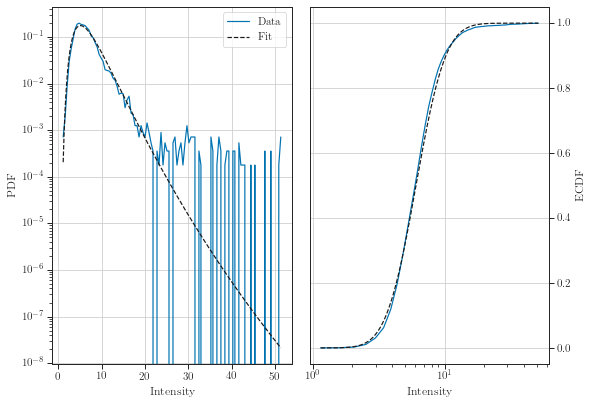

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.291313
         Iterations: 23
         Function evaluations: 47
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:                -79149.
Model:                     Likelihood   AIC:                         1.583e+05
Method:            Maximum Likelihood   BIC:                         1.583e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        01:57:00                                         
No. Observations:               34543                                         
Df Residuals:                   34541                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

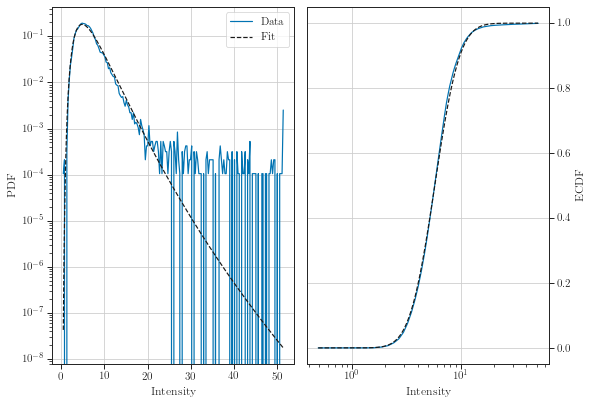

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.336032
         Iterations: 23
         Function evaluations: 47
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -1.4217e+05
Model:                     Likelihood   AIC:                         2.843e+05
Method:            Maximum Likelihood   BIC:                         2.844e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        01:57:01                                         
No. Observations:               60860                                         
Df Residuals:                   60858                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

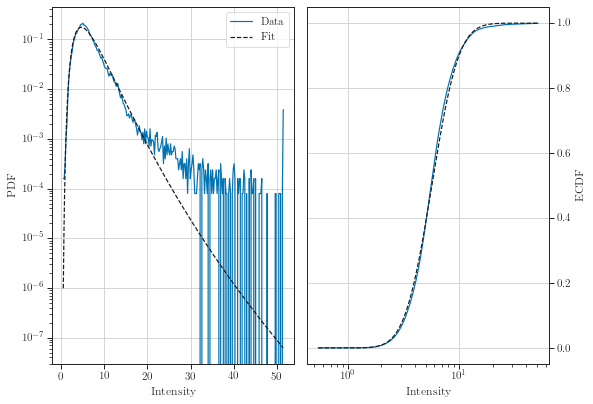

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.359509
         Iterations: 23
         Function evaluations: 47
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -2.1205e+05
Model:                     Likelihood   AIC:                         4.241e+05
Method:            Maximum Likelihood   BIC:                         4.241e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        01:57:03                                         
No. Observations:               89871                                         
Df Residuals:                   89869                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

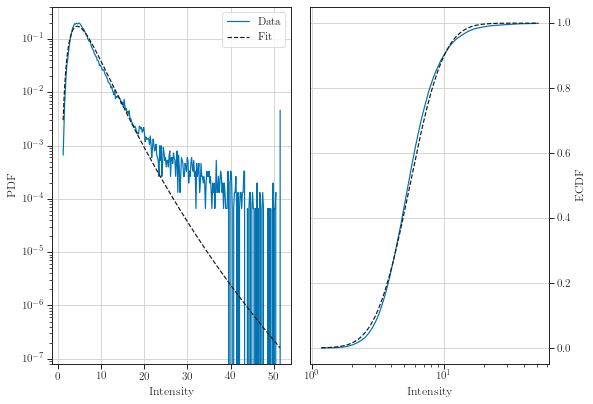

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.264677
         Iterations: 23
         Function evaluations: 47
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -2.6646e+05
Model:                     Likelihood   AIC:                         5.329e+05
Method:            Maximum Likelihood   BIC:                         5.329e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        01:57:04                                         
No. Observations:              117657                                         
Df Residuals:                  117655                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

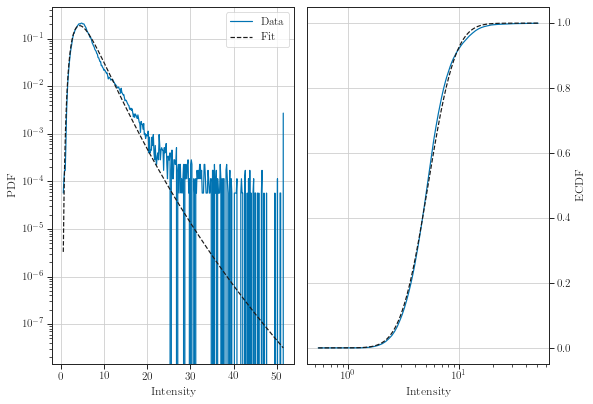

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.343037
         Iterations: 23
         Function evaluations: 47
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -3.3057e+05
Model:                     Likelihood   AIC:                         6.612e+05
Method:            Maximum Likelihood   BIC:                         6.612e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        01:57:05                                         
No. Observations:              141088                                         
Df Residuals:                  141086                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

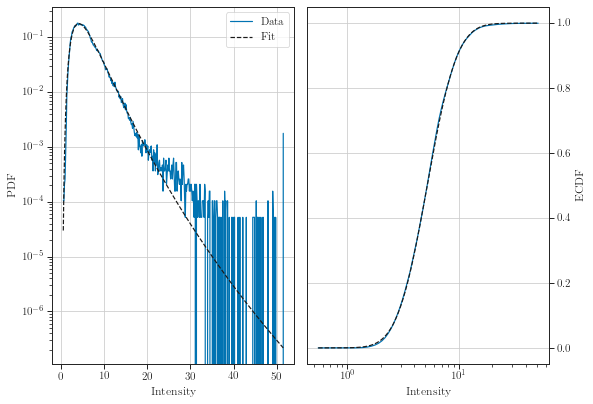

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.227001
         Iterations: 23
         Function evaluations: 47
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -4.0259e+05
Model:                     Likelihood   AIC:                         8.052e+05
Method:            Maximum Likelihood   BIC:                         8.052e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        01:57:07                                         
No. Observations:              180778                                         
Df Residuals:                  180776                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

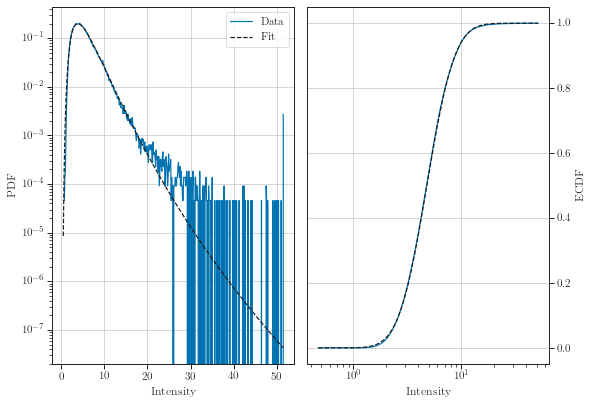

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.429187
         Iterations: 24
         Function evaluations: 48
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -4.1671e+05
Model:                     Likelihood   AIC:                         8.334e+05
Method:            Maximum Likelihood   BIC:                         8.335e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        01:57:09                                         
No. Observations:              171543                                         
Df Residuals:                  171541                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

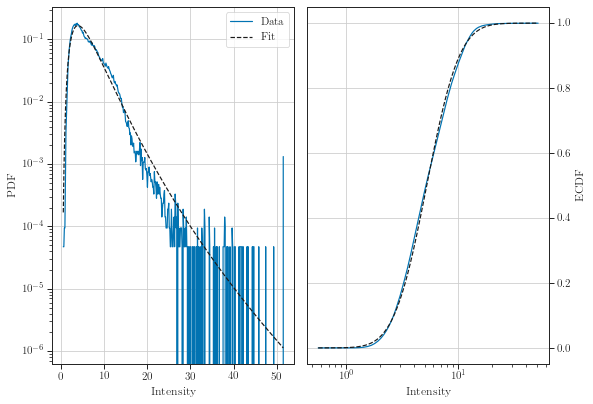

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.646744
         Iterations: 24
         Function evaluations: 48
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -1.8448e+05
Model:                     Likelihood   AIC:                         3.690e+05
Method:            Maximum Likelihood   BIC:                         3.690e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        01:57:10                                         
No. Observations:               69701                                         
Df Residuals:                   69699                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

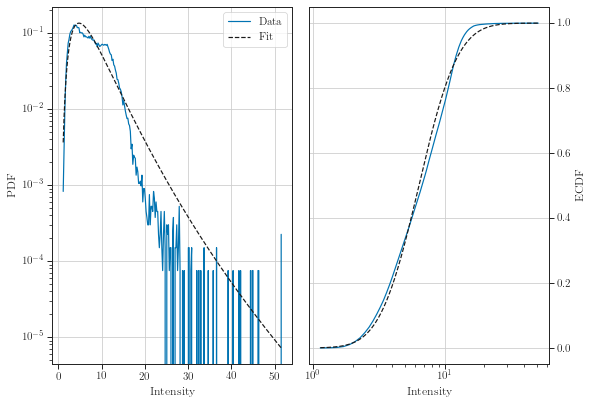

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.788737
         Iterations: 25
         Function evaluations: 51
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:                -35372.
Model:                     Likelihood   AIC:                         7.075e+04
Method:            Maximum Likelihood   BIC:                         7.077e+04
Date:                Thu, 09 Jul 2020                                         
Time:                        01:57:10                                         
No. Observations:               12684                                         
Df Residuals:                   12682                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

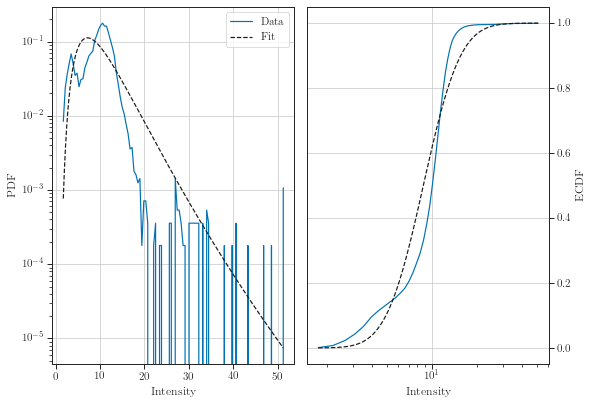

In [18]:
bins_m31 = np.linspace(6, 20, 15) * u.kpc

bins_m33 = np.linspace(0, 10, 11) * u.kpc

m31_pdfs = []
m33_pdfs = []

for i, (low, high) in enumerate(zip(bins_m31[:-1], bins_m31[1:])):

    bin_locs = np.where(np.logical_and(radii_m31 >= low, radii_m31 < high))

    bin_lwidths = []
    
    for j in range(m31_lwidths_distinct.shape[0]):
        bin_lwidths.append(m31_lwidths_distinct[j][bin_locs].value)
    
    bin_lwidths = np.array(bin_lwidths).ravel()
    
    m31_pdfs.append(PDF(bin_lwidths))
    m31_pdfs[-1].run(verbose=True)

for i, (low, high) in enumerate(zip(bins_m33[:-1], bins_m33[1:])):

    bin_locs = np.where(np.logical_and(radii_m33 >= low, radii_m33 < high))
#     bin_locs = np.logical_and(radii_m33 >= low, radii_m33 < high)

    bin_lwidths = []
    
    for j in range(m33_lwidths_distinct.shape[0]):
        bin_lwidths.append(m33_lwidths_distinct[j][bin_locs].value)
    
    bin_lwidths = np.array(bin_lwidths).ravel()
    
    m33_pdfs.append(PDF(bin_lwidths))
    m33_pdfs[-1].run(verbose=True)
    

Text(0.5, 0.04, '$R_{\\rm gal}$ (kpc)')

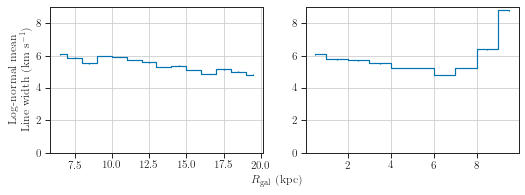

In [19]:
# Plot the mean lwidth from the fits
twocolumn_twopanel_figure()


fig = plt.figure()

ax = fig.add_subplot(121)

bins_cent_m31 = (bins_m31[1:] + bins_m31[:-1]) / 2.
ax.errorbar(bins_cent_m31.value, [pdf.model_params[1] for pdf in m31_pdfs],
            yerr=[pdf.model_stderrs[1] for pdf in m31_pdfs],
        drawstyle='steps-mid')

ax2 = fig.add_subplot(122, sharey=ax)

bins_cent_m33 = (bins_m33[1:] + bins_m33[:-1]) / 2.
ax2.errorbar(bins_cent_m33.value, [pdf.model_params[1] for pdf in m33_pdfs],
             yerr=[pdf.model_stderrs[1] for pdf in m33_pdfs],
             drawstyle='steps-mid')

ax.grid(True)
ax2.grid(True)

ax.set_ylim([0, 9])

ax.set_ylabel("Log-normal mean\n" + r"Line width (km s$^{-1}$)")

fig.subplots_adjust(bottom=0.18)

fig.text(0.5, 0.04, r'$R_{\rm gal}$ (kpc)', ha='center', va='center')



Text(0.5, 0.04, '$R_{\\rm gal}$ (kpc)')

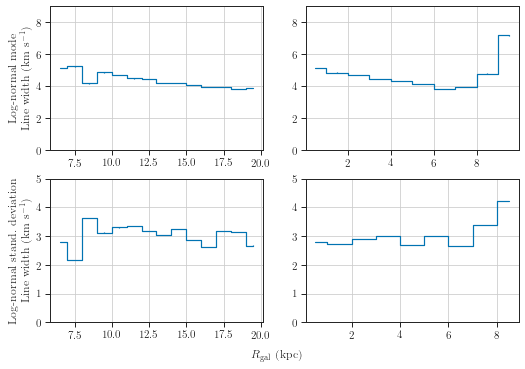

In [20]:
# Plot the mean lwidth from the fits + dispersion
twocolumn_figure()

def lognorm_mode(pars):
    
    mode = np.exp(np.log(pars[1]) - pars[0]**2)
    
    return mode

fig = plt.figure()

ax = fig.add_subplot(221)

bins_cent_m31 = (bins_m31[1:] + bins_m31[:-1]) / 2.
# ax.errorbar(bins_cent_m31.value, [pdf.model_params[1] for pdf in m31_pdfs],
#             yerr=[pdf.model_stderrs[1] for pdf in m31_pdfs],
#         drawstyle='steps-mid')
ax.errorbar(bins_cent_m31.value, [lognorm_mode(pdf.model_params) for pdf in m31_pdfs],
            yerr=[pdf.model_stderrs[1] for pdf in m31_pdfs],
        drawstyle='steps-mid')


ax2 = fig.add_subplot(222, sharey=ax)

bins_cent_m33 = (bins_m33[1:] + bins_m33[:-1]) / 2.
# ax2.errorbar(bins_cent_m33.value, [pdf.model_params[1] for pdf in m33_pdfs],
#              yerr=[pdf.model_stderrs[1] for pdf in m33_pdfs],
#              drawstyle='steps-mid')
ax2.errorbar(bins_cent_m33.value, [lognorm_mode(pdf.model_params) for pdf in m33_pdfs],
             yerr=[pdf.model_stderrs[1] for pdf in m33_pdfs],
             drawstyle='steps-mid')

# Calculate the standard deviation from the variance
def lognorm_std(pars):
    
    var = (np.exp(pars[0]**2) - 1) * np.exp(2 * np.log(pars[1]) + pars[0]**2)
    
    return np.sqrt(var)

ax3 = fig.add_subplot(223)

# ax3.errorbar(bins_cent_m31.value, [pdf.model_params[0] for pdf in m31_pdfs],
#             yerr=[pdf.model_stderrs[0] for pdf in m31_pdfs],
#         drawstyle='steps-mid')

ax3.errorbar(bins_cent_m31.value, [lognorm_std(pdf.model_params) for pdf in m31_pdfs],
            yerr=[pdf.model_stderrs[0] for pdf in m31_pdfs],
        drawstyle='steps-mid')

ax4 = fig.add_subplot(224, sharey=ax3)

# ax4.errorbar(bins_cent_m33.value, [pdf.model_params[0] for pdf in m33_pdfs],
#              yerr=[pdf.model_stderrs[0] for pdf in m33_pdfs],
#              drawstyle='steps-mid')

ax4.errorbar(bins_cent_m33.value[:-1], [lognorm_std(pdf.model_params) for pdf in m33_pdfs[:-1]],
             yerr=[pdf.model_stderrs[0] for pdf in m33_pdfs[:-1]],
             drawstyle='steps-mid')

ax.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

ax.set_ylim([0, 9])
ax3.set_ylim([0, 5])

ax.set_ylabel("Log-normal mode\n" + r"Line width (km s$^{-1}$)")
ax3.set_ylabel("Log-normal stand. deviation\n" + r"Line width (km s$^{-1}$)")

fig.subplots_adjust(bottom=0.12)

fig.text(0.5, 0.04, r'$R_{\rm gal}$ (kpc)', ha='center', va='center')



Here I've plotted the mode and standard deviation. The mode follows closely with the mean, just a slightly smaller values. There isn't much of a trend in the standard deviation. It's a little tough to tell b/c the analytical-ish uncertainties are way too small.

To go farther, we need to include some form of censoring on the low end. And include the uncertainties in the fits...

(0, 3)

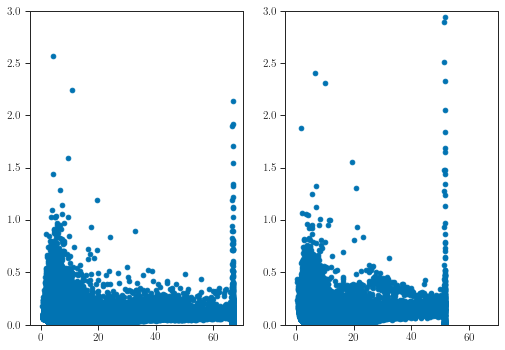

In [21]:
# Line width uncertainty.

fig = plt.figure()

ax = fig.add_subplot(121)

ax.scatter(m31_lwidths_distinct[np.isfinite(m31_lwidths_distinct)],
           m31_lwidths_distinct_uncert[np.isfinite(m31_lwidths_distinct)] / m31_lwidths_distinct[np.isfinite(m31_lwidths_distinct)],)


ax2 = fig.add_subplot(122, sharex=ax, sharey=ax)

ax2.scatter(m33_lwidths_distinct[np.isfinite(m33_lwidths_distinct)],
            m33_lwidths_distinct_uncert[np.isfinite(m33_lwidths_distinct)] / m33_lwidths_distinct[np.isfinite(m33_lwidths_distinct)],)

ax.set_ylim([0, 3])

Mostly good. We see that the line widths in the tail (~>15 km/s) have large uncertainties. It's time to break out the good set of fits.



Now compare with the amplitudes. We know these have a larger cut-off at the low S/N end, and so its selection function is quite important. First, blindly fit the PDFs:

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 3.599552
         Iterations: 28
         Function evaluations: 57
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:                -41776.
Model:                     Likelihood   AIC:                         8.356e+04
Method:            Maximum Likelihood   BIC:                         8.358e+04
Date:                Thu, 09 Jul 2020                                         
Time:                        19:18:27                                         
No. Observations:               11606                                         
Df Residuals:                   11604                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

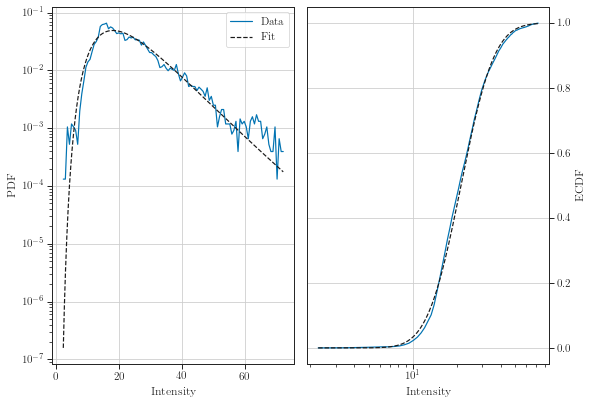

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 3.327017
         Iterations: 27
         Function evaluations: 55
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:                -25375.
Model:                     Likelihood   AIC:                         5.076e+04
Method:            Maximum Likelihood   BIC:                         5.078e+04
Date:                Thu, 09 Jul 2020                                         
Time:                        19:18:28                                         
No. Observations:                7627                                         
Df Residuals:                    7625                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

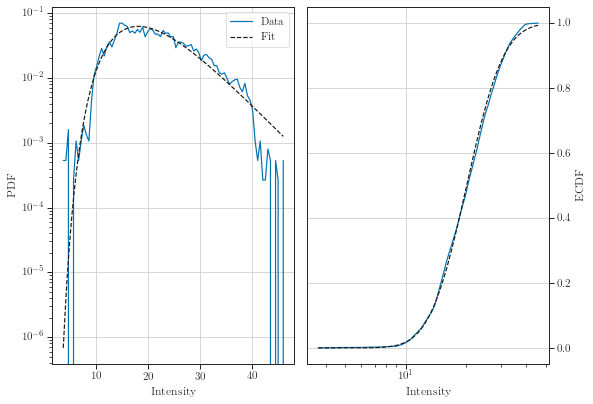

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 3.007537
         Iterations: 27
         Function evaluations: 55
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:                -38656.
Model:                     Likelihood   AIC:                         7.732e+04
Method:            Maximum Likelihood   BIC:                         7.734e+04
Date:                Thu, 09 Jul 2020                                         
Time:                        19:18:29                                         
No. Observations:               12853                                         
Df Residuals:                   12851                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

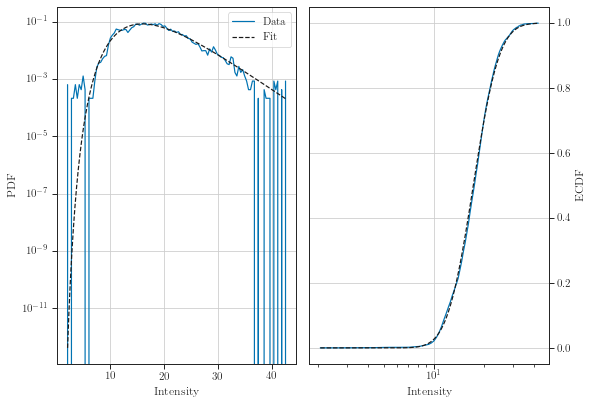

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 3.527674
         Iterations: 28
         Function evaluations: 56
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -1.0813e+05
Model:                     Likelihood   AIC:                         2.163e+05
Method:            Maximum Likelihood   BIC:                         2.163e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        19:18:32                                         
No. Observations:               30652                                         
Df Residuals:                   30650                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

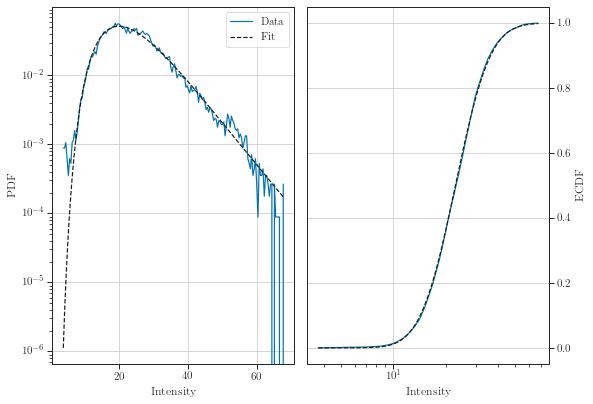

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 4.089739
         Iterations: 29
         Function evaluations: 59
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -2.0102e+05
Model:                     Likelihood   AIC:                         4.021e+05
Method:            Maximum Likelihood   BIC:                         4.021e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        19:18:33                                         
No. Observations:               49153                                         
Df Residuals:                   49151                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

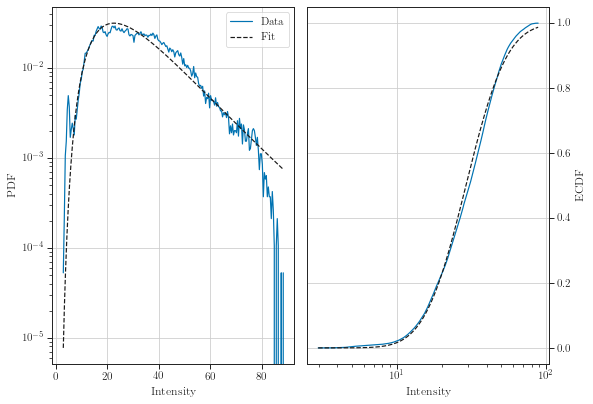

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 4.446638
         Iterations: 31
         Function evaluations: 62
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -2.8636e+05
Model:                     Likelihood   AIC:                         5.727e+05
Method:            Maximum Likelihood   BIC:                         5.728e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        19:18:34                                         
No. Observations:               64400                                         
Df Residuals:                   64398                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

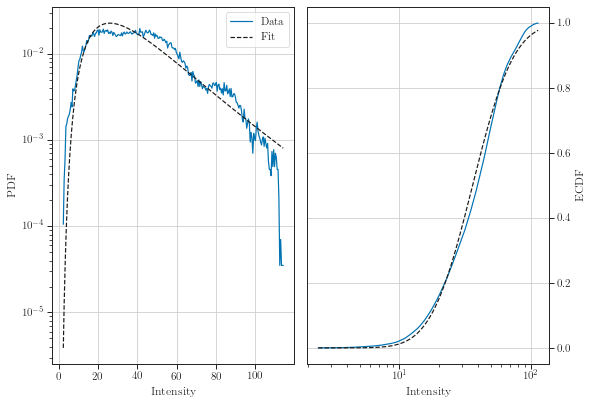

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 4.395378
         Iterations: 30
         Function evaluations: 60
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -3.5603e+05
Model:                     Likelihood   AIC:                         7.121e+05
Method:            Maximum Likelihood   BIC:                         7.121e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        19:18:35                                         
No. Observations:               81001                                         
Df Residuals:                   80999                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

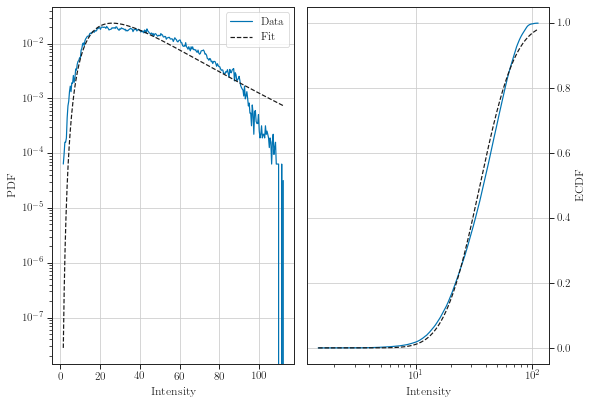

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 4.121096
         Iterations: 29
         Function evaluations: 59
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -3.6020e+05
Model:                     Likelihood   AIC:                         7.204e+05
Method:            Maximum Likelihood   BIC:                         7.204e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        19:18:37                                         
No. Observations:               87405                                         
Df Residuals:                   87403                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

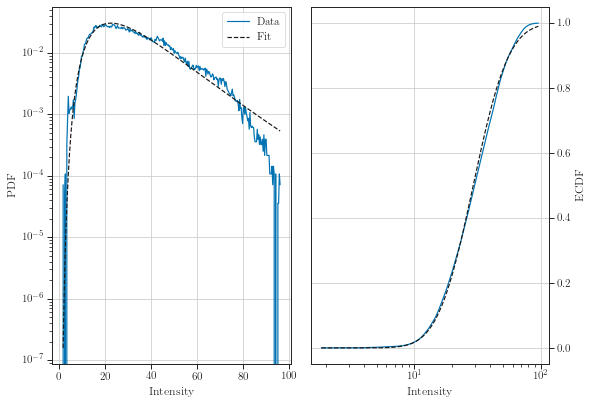

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 4.028094
         Iterations: 29
         Function evaluations: 59
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -3.3879e+05
Model:                     Likelihood   AIC:                         6.776e+05
Method:            Maximum Likelihood   BIC:                         6.776e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        19:18:39                                         
No. Observations:               84106                                         
Df Residuals:                   84104                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

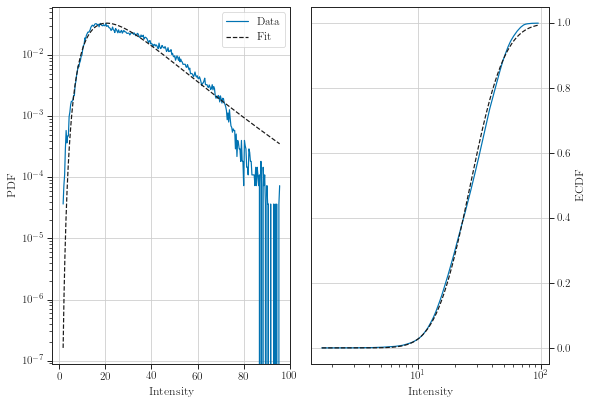

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 4.018487
         Iterations: 29
         Function evaluations: 59
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -3.4309e+05
Model:                     Likelihood   AIC:                         6.862e+05
Method:            Maximum Likelihood   BIC:                         6.862e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        19:18:40                                         
No. Observations:               85378                                         
Df Residuals:                   85376                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

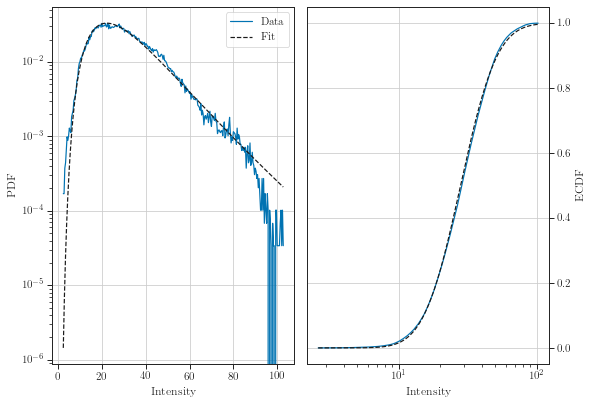

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 4.121335
         Iterations: 29
         Function evaluations: 59
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -3.2962e+05
Model:                     Likelihood   AIC:                         6.592e+05
Method:            Maximum Likelihood   BIC:                         6.593e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        19:18:42                                         
No. Observations:               79979                                         
Df Residuals:                   79977                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

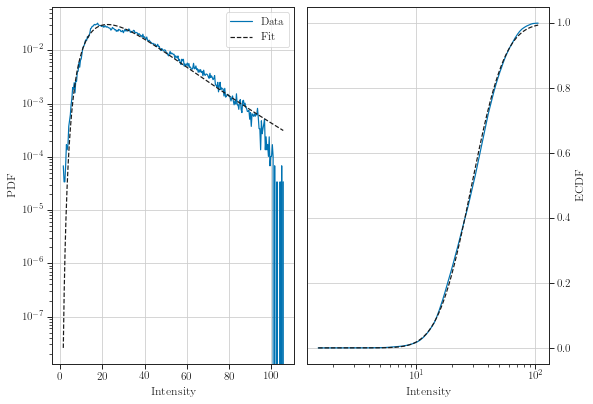

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 3.692318
         Iterations: 29
         Function evaluations: 59
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -2.5337e+05
Model:                     Likelihood   AIC:                         5.067e+05
Method:            Maximum Likelihood   BIC:                         5.068e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        19:18:43                                         
No. Observations:               68620                                         
Df Residuals:                   68618                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

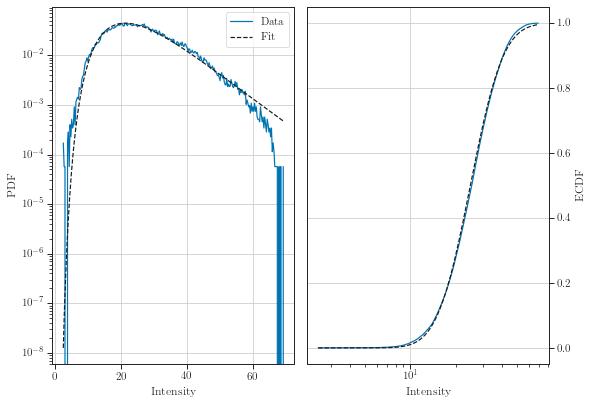

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 3.741535
         Iterations: 29
         Function evaluations: 59
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -1.8736e+05
Model:                     Likelihood   AIC:                         3.747e+05
Method:            Maximum Likelihood   BIC:                         3.748e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        19:18:44                                         
No. Observations:               50077                                         
Df Residuals:                   50075                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

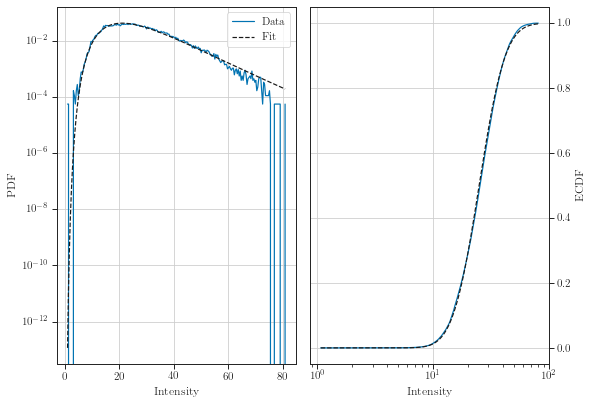

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 3.924420
         Iterations: 29
         Function evaluations: 59
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -1.3204e+05
Model:                     Likelihood   AIC:                         2.641e+05
Method:            Maximum Likelihood   BIC:                         2.641e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        19:18:44                                         
No. Observations:               33645                                         
Df Residuals:                   33643                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

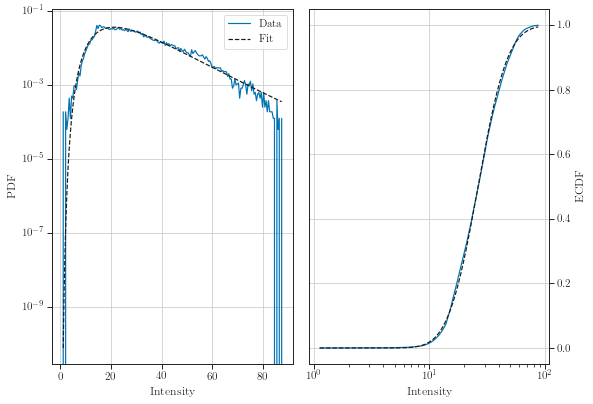

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 3.719802
         Iterations: 26
         Function evaluations: 53
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:                -45333.
Model:                     Likelihood   AIC:                         9.067e+04
Method:            Maximum Likelihood   BIC:                         9.069e+04
Date:                Thu, 09 Jul 2020                                         
Time:                        19:18:45                                         
No. Observations:               12187                                         
Df Residuals:                   12185                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

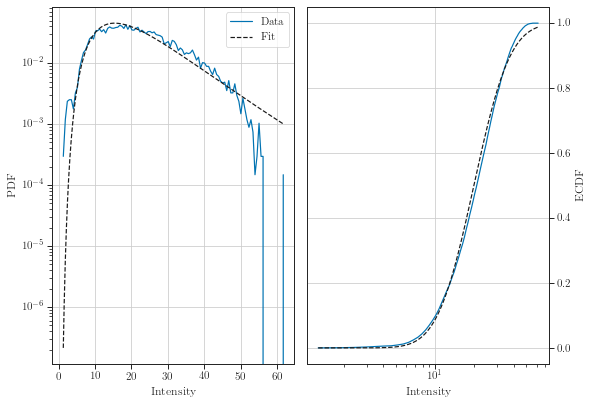

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 3.931692
         Iterations: 30
         Function evaluations: 60
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -1.3581e+05
Model:                     Likelihood   AIC:                         2.716e+05
Method:            Maximum Likelihood   BIC:                         2.717e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        19:18:46                                         
No. Observations:               34543                                         
Df Residuals:                   34541                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

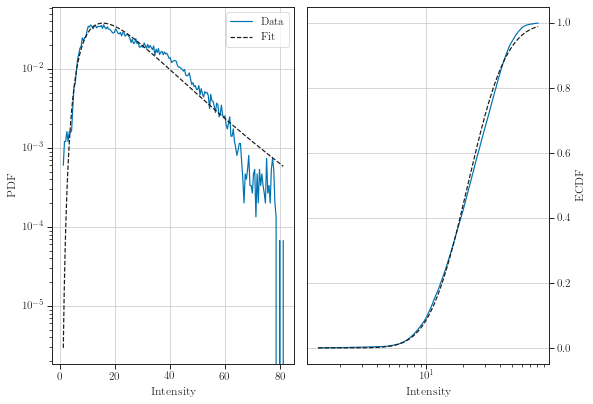

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 3.883059
         Iterations: 29
         Function evaluations: 57
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -2.3632e+05
Model:                     Likelihood   AIC:                         4.727e+05
Method:            Maximum Likelihood   BIC:                         4.727e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        19:18:47                                         
No. Observations:               60860                                         
Df Residuals:                   60858                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

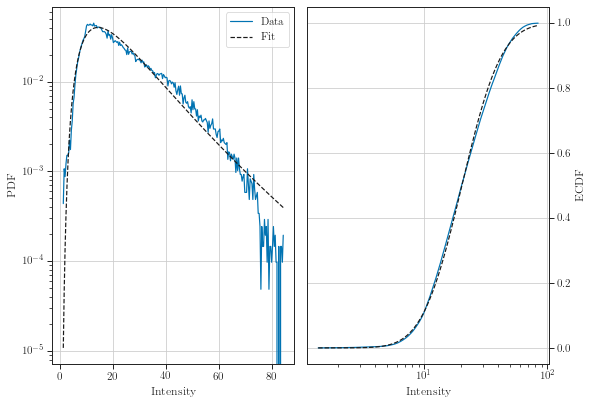

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 3.858428
         Iterations: 28
         Function evaluations: 56
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -3.4676e+05
Model:                     Likelihood   AIC:                         6.935e+05
Method:            Maximum Likelihood   BIC:                         6.936e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        19:18:48                                         
No. Observations:               89871                                         
Df Residuals:                   89869                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

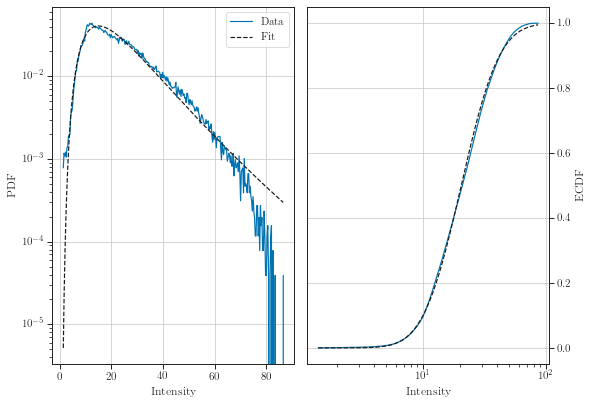

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 3.970882
         Iterations: 30
         Function evaluations: 60
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -4.6720e+05
Model:                     Likelihood   AIC:                         9.344e+05
Method:            Maximum Likelihood   BIC:                         9.344e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        19:18:49                                         
No. Observations:              117657                                         
Df Residuals:                  117655                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

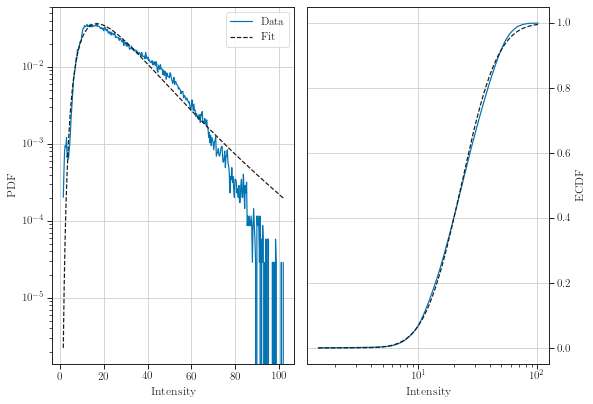

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 3.819833
         Iterations: 29
         Function evaluations: 58
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -5.3893e+05
Model:                     Likelihood   AIC:                         1.078e+06
Method:            Maximum Likelihood   BIC:                         1.078e+06
Date:                Thu, 09 Jul 2020                                         
Time:                        19:18:51                                         
No. Observations:              141088                                         
Df Residuals:                  141086                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

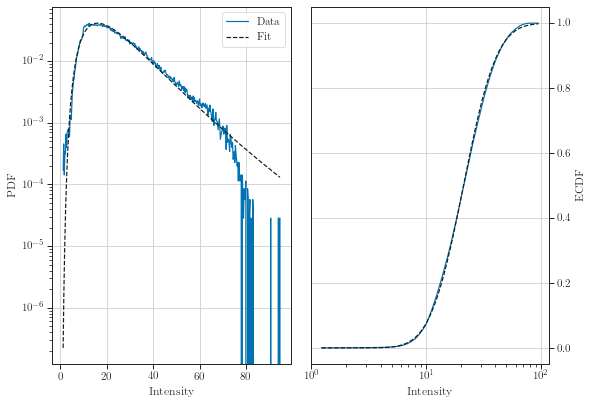

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 3.809056
         Iterations: 28
         Function evaluations: 57
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -6.8859e+05
Model:                     Likelihood   AIC:                         1.377e+06
Method:            Maximum Likelihood   BIC:                         1.377e+06
Date:                Thu, 09 Jul 2020                                         
Time:                        19:18:52                                         
No. Observations:              180778                                         
Df Residuals:                  180776                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

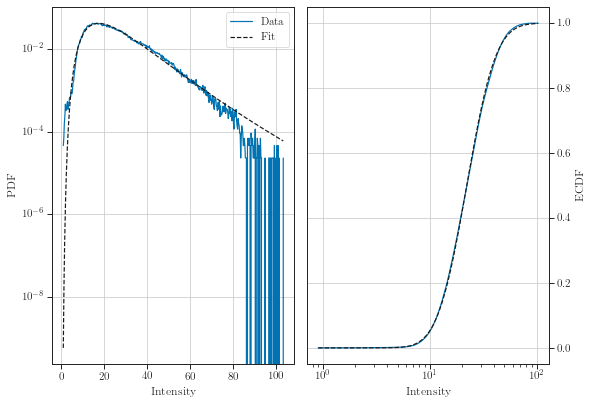

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 3.462884
         Iterations: 26
         Function evaluations: 53
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -5.9403e+05
Model:                     Likelihood   AIC:                         1.188e+06
Method:            Maximum Likelihood   BIC:                         1.188e+06
Date:                Thu, 09 Jul 2020                                         
Time:                        19:18:54                                         
No. Observations:              171543                                         
Df Residuals:                  171541                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

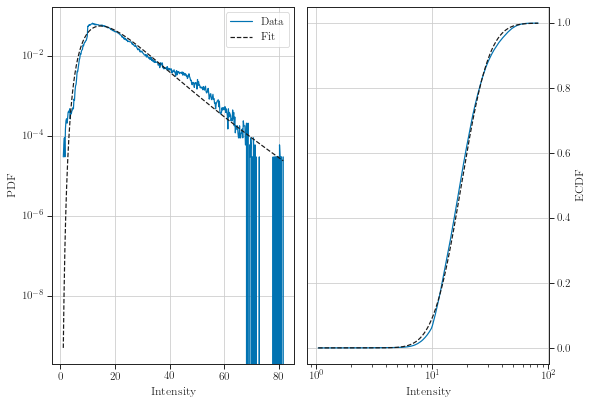

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 3.122026
         Iterations: 27
         Function evaluations: 54
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -2.1761e+05
Model:                     Likelihood   AIC:                         4.352e+05
Method:            Maximum Likelihood   BIC:                         4.353e+05
Date:                Thu, 09 Jul 2020                                         
Time:                        19:18:55                                         
No. Observations:               69701                                         
Df Residuals:                   69699                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

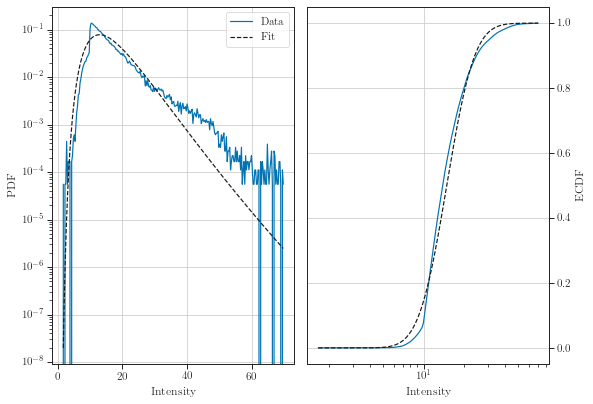

/mnt/space/ekoch/ownCloud/code_development/TurbuStat/turbustat/statistics/pdf/compare_pdf.py:57: RuntimeWarning: invalid value encountered in greater
  output_data > min_val)


Optimization terminated successfully.
         Current function value: 2.473319
         Iterations: 24
         Function evaluations: 49
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:                -31372.
Model:                     Likelihood   AIC:                         6.275e+04
Method:            Maximum Likelihood   BIC:                         6.277e+04
Date:                Thu, 09 Jul 2020                                         
Time:                        19:18:56                                         
No. Observations:               12684                                         
Df Residuals:                   12682                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

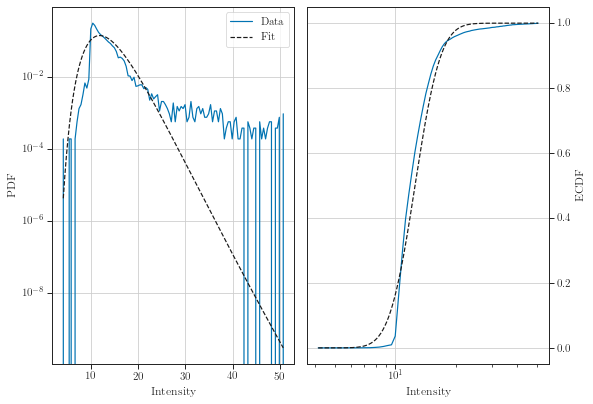

In [80]:
bins_m31 = np.linspace(6, 20, 15) * u.kpc

bins_m33 = np.linspace(0, 10, 11) * u.kpc

m31_pdfs_amps = []
m33_pdfs_amps = []

for i, (low, high) in enumerate(zip(bins_m31[:-1], bins_m31[1:])):

    bin_locs = np.where(np.logical_and(radii_m31 >= low, radii_m31 < high))

    bin_amps = []
    
    for j in range(m31_amps_distinct.shape[0]):
        bin_amps.append(m31_amps_distinct[j][bin_locs].value)
    
    bin_amps = np.array(bin_amps).ravel()
    
    m31_pdfs_amps.append(PDF(bin_amps))
    m31_pdfs_amps[-1].run(verbose=True)

for i, (low, high) in enumerate(zip(bins_m33[:-1], bins_m33[1:])):

    bin_locs = np.where(np.logical_and(radii_m33 >= low, radii_m33 < high))
#     bin_locs = np.logical_and(radii_m33 >= low, radii_m33 < high)

    bin_amps = []
    
    for j in range(m33_amps_distinct.shape[0]):
        bin_amps.append(m33_amps_distinct[j][bin_locs].value)
    
    bin_amps = np.array(bin_amps).ravel()
    
    m33_pdfs_amps.append(PDF(bin_amps))
    m33_pdfs_amps[-1].run(verbose=True)
    

Most of these are reasonable looking fits, though with some larger deviations compared to the line widths. On the low-end, I expect this is the S/N completeness effect.

Text(0.5, 0.04, '$R_{\\rm gal}$ (kpc)')

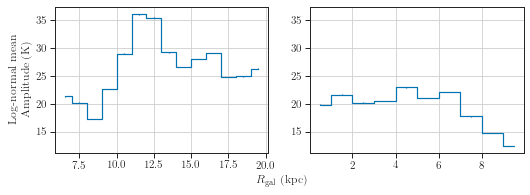

In [82]:
# Plot the mean lwidth from the fits
twocolumn_twopanel_figure()


fig = plt.figure()

ax = fig.add_subplot(121)

bins_cent_m31 = (bins_m31[1:] + bins_m31[:-1]) / 2.
ax.errorbar(bins_cent_m31.value, [pdf.model_params[1] for pdf in m31_pdfs_amps],
            yerr=[pdf.model_stderrs[1] for pdf in m31_pdfs_amps],
        drawstyle='steps-mid')

ax2 = fig.add_subplot(122, sharey=ax)

bins_cent_m33 = (bins_m33[1:] + bins_m33[:-1]) / 2.
ax2.errorbar(bins_cent_m33.value, [pdf.model_params[1] for pdf in m33_pdfs_amps],
             yerr=[pdf.model_stderrs[1] for pdf in m33_pdfs_amps],
             drawstyle='steps-mid')

ax.grid(True)
ax2.grid(True)

# ax.set_ylim([0, 9])

ax.set_ylabel("Log-normal mean\n" + r"Amplitude (K)")

fig.subplots_adjust(bottom=0.18)

fig.text(0.5, 0.04, r'$R_{\rm gal}$ (kpc)', ha='center', va='center')



Text(0.5, 0.04, '$R_{\\rm gal}$ (kpc)')

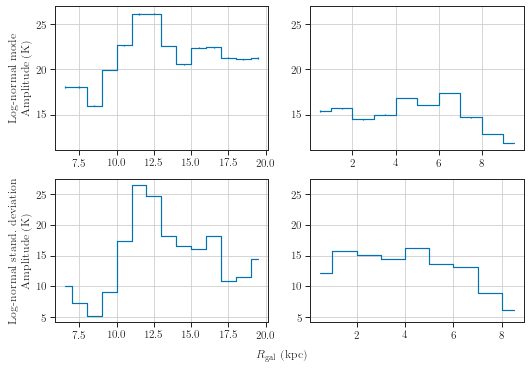

In [83]:
# Plot the mean lwidth from the fits + dispersion
twocolumn_figure()

def lognorm_mode(pars):
    
    mode = np.exp(np.log(pars[1]) - pars[0]**2)
    
    return mode

fig = plt.figure()

ax = fig.add_subplot(221)

bins_cent_m31 = (bins_m31[1:] + bins_m31[:-1]) / 2.
# ax.errorbar(bins_cent_m31.value, [pdf.model_params[1] for pdf in m31_pdfs_amps],
#             yerr=[pdf.model_stderrs[1] for pdf in m31_pdfs_amps],
#         drawstyle='steps-mid')
ax.errorbar(bins_cent_m31.value, [lognorm_mode(pdf.model_params) for pdf in m31_pdfs_amps],
            yerr=[pdf.model_stderrs[1] for pdf in m31_pdfs_amps],
        drawstyle='steps-mid')


ax2 = fig.add_subplot(222, sharey=ax)

bins_cent_m33 = (bins_m33[1:] + bins_m33[:-1]) / 2.
# ax2.errorbar(bins_cent_m33.value, [pdf.model_params[1] for pdf in m33_pdfs_amps],
#              yerr=[pdf.model_stderrs[1] for pdf in m33_pdfs_amps],
#              drawstyle='steps-mid')
ax2.errorbar(bins_cent_m33.value, [lognorm_mode(pdf.model_params) for pdf in m33_pdfs_amps],
             yerr=[pdf.model_stderrs[1] for pdf in m33_pdfs_amps],
             drawstyle='steps-mid')

# Calculate the standard deviation from the variance
def lognorm_std(pars):
    
    var = (np.exp(pars[0]**2) - 1) * np.exp(2 * np.log(pars[1]) + pars[0]**2)
    
    return np.sqrt(var)

ax3 = fig.add_subplot(223)

# ax3.errorbar(bins_cent_m31.value, [pdf.model_params[0] for pdf in m31_pdfs_amps],
#             yerr=[pdf.model_stderrs[0] for pdf in m31_pdfs_amps],
#         drawstyle='steps-mid')

ax3.errorbar(bins_cent_m31.value, [lognorm_std(pdf.model_params) for pdf in m31_pdfs_amps],
            yerr=[pdf.model_stderrs[0] for pdf in m31_pdfs_amps],
        drawstyle='steps-mid')

ax4 = fig.add_subplot(224, sharey=ax3)

# ax4.errorbar(bins_cent_m33.value, [pdf.model_params[0] for pdf in m33_pdfs_amps],
#              yerr=[pdf.model_stderrs[0] for pdf in m33_pdfs_amps],
#              drawstyle='steps-mid')

ax4.errorbar(bins_cent_m33.value[:-1], [lognorm_std(pdf.model_params) for pdf in m33_pdfs_amps[:-1]],
             yerr=[pdf.model_stderrs[0] for pdf in m33_pdfs_amps[:-1]],
             drawstyle='steps-mid')

ax.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

#ax.set_ylim([0, 9])
#ax3.set_ylim([0, 5])

ax.set_ylabel("Log-normal mode\n" + r"Amplitude (K)")
ax3.set_ylabel("Log-normal stand. deviation\n" + r"Amplitude (K)")

fig.subplots_adjust(bottom=0.12)

fig.text(0.5, 0.04, r'$R_{\rm gal}$ (kpc)', ha='center', va='center')



Here we see that

In [87]:
print(np.nanmax(m31_amps), np.nanmax(m31_amps_distinct), np.nanmax(m31_amps_blend))

128.79424980888803 K 114.39931200431242 K 128.79424980888803 K


Turning to more detailed modeling. Initially including data resampling to handle fit uncertainties

In [22]:
import pystan

In [41]:
model_code = """
data {
 int n;
 vector[n] xobs; //observed x
 vector[n] xobs_uncert; // observational uncertainty on x
}

parameters {
 real mu;
 real<lower=0> sigma;
 vector<lower=0>[n] xtrue; //true sample x
}

model {

  /* Priors */
  mu ~ normal(0, 5);
  sigma ~ normal(0, 5);

  xtrue ~ lognormal(mu, sigma);

  xobs ~ normal(xtrue, xobs_uncert);

}

"""

sm = pystan.StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fc4140a481535a84cb48edafe54a46c NOW.


In [62]:

fin_pts = np.logical_and(np.isfinite(m31_lwidths_distinct),
                         np.isfinite(m31_lwidths_distinct_uncert))

m31_lwidths_finite = m31_lwidths_distinct[fin_pts]

# Just reduced the number of points for now.
# nskip = 50
nskip = 5
m31_lwidths_finite = m31_lwidths_finite[::nskip].value
m31_lwidths_finite_uncert = m31_lwidths_distinct_uncert[fin_pts][::nskip].value

assert m31_lwidths_finite.size == m31_lwidths_finite_uncert.size

print(m31_lwidths_finite.size)

print(m31_lwidths_finite.max(), m31_lwidths_finite_uncert.max())

m31_lwidth_data = {'n': m31_lwidths_finite.size,
                   'xobs': m31_lwidths_finite,
                   'xobs_uncert': m31_lwidths_finite_uncert}

fit_m31 = sm.sampling(data=m31_lwidth_data, iter=1000, chains=4, verbose=True)

del m31_lwidth_data

173559
66.75038072741621 376.70238025318855


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [63]:
fit_m31_results = fit_m31.summary(pars=['mu', 'sigma'])

diagnost_m31 = pystan.check_hmc_diagnostics(fit_m31, pars=['mu', 'sigma'])

for key in diagnost_m31:
    if not diagnost_m31[key]:
        raise ValueError(f"Check failed for {key}")

diagnost_m31

{'n_eff': True,
 'Rhat': True,
 'divergence': True,
 'treedepth': True,
 'energy': True}

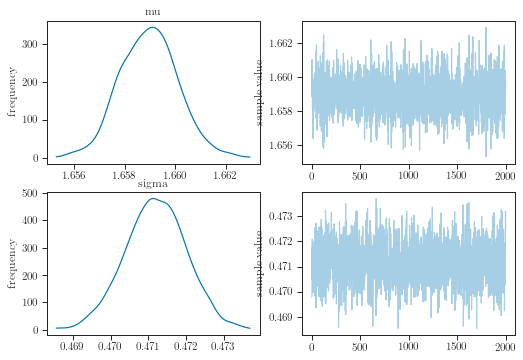

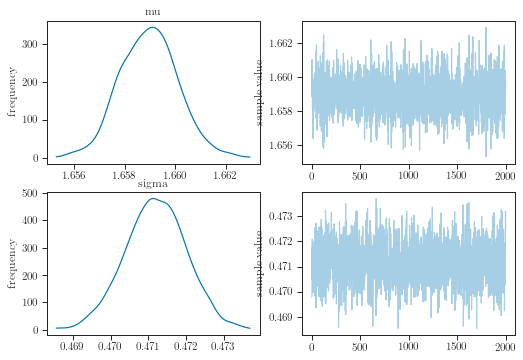

In [64]:

fit_m31.plot(['mu', 'sigma'])

In [65]:

fin_pts = np.logical_and(np.isfinite(m33_lwidths_distinct),
                         np.isfinite(m33_lwidths_distinct_uncert))

m33_lwidths_finite = m33_lwidths_distinct[fin_pts]

# Just reduced the number of points for now.
# nskip = 50
nskip = 5
m33_lwidths_finite = m33_lwidths_finite[::nskip].value
m33_lwidths_finite_uncert = m33_lwidths_distinct_uncert[fin_pts][::nskip].value

assert m33_lwidths_finite.size == m33_lwidths_finite_uncert.size

print(m33_lwidths_finite.size)

print(m33_lwidths_finite.max(), m33_lwidths_finite_uncert.max())

m33_lwidth_data = {'n': m33_lwidths_finite.size,
                   'xobs': m33_lwidths_finite,
                   'xobs_uncert': m33_lwidths_finite_uncert}

fit_m33 = sm.sampling(data=m33_lwidth_data, iter=1000, chains=4, verbose=True)

del m33_lwidth_data

178607
51.572170637015454 537.3625999636276


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [66]:
fit_m33_results = fit_m33.summary(pars=['mu', 'sigma'])

diagnost_m33 = pystan.check_hmc_diagnostics(fit_m33, pars=['mu', 'sigma'])

for key in diagnost_m33:
    if not diagnost_m33[key]:
        raise ValueError(f"Check failed for {key}")

diagnost_m33

{'n_eff': True,
 'Rhat': True,
 'divergence': True,
 'treedepth': True,
 'energy': True}

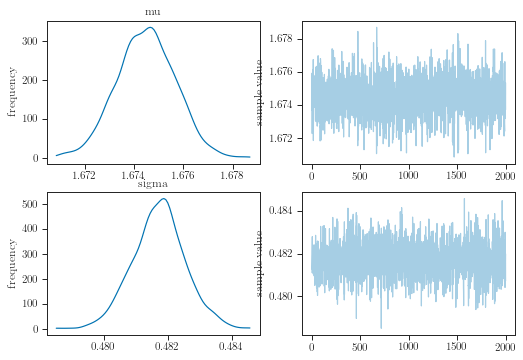

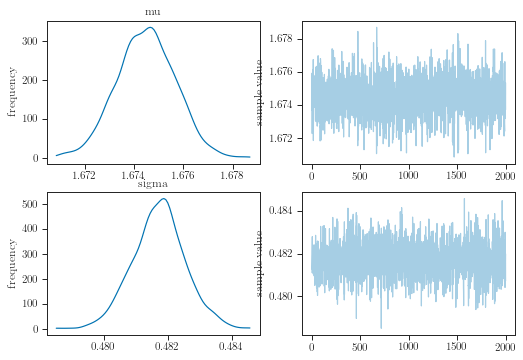

In [67]:

fit_m33.plot(['mu', 'sigma'])

This includes fitting with the uncertainties, and so is a fair improvement. Though it doesn't look like much has changed.

Fewer components at lower S/N and narrow line widths. First, try joint modeling with the amplitude and line width. Not sure yet how to account for correlations.

In [ ]:
model_code = """
data {
 int n;
 vector[n] xobs; //observed x
 vector[n] xobs_uncert; // observational uncertainty on x
}

parameters {
 real mu;
 real<lower=0> sigma;
 vector<lower=0>[n] xtrue; //true sample x
}

model {

  /* Priors */
  mu ~ normal(0, 5);
  sigma ~ normal(0, 5);

  xtrue ~ lognormal(mu, sigma);

// for(i in 1:n){
//    xtrue[i] ~ lognormal(mu, sigma);
//}

xobs ~ normal(xtrue, xobs_uncert);

}

"""

sm_sel = pystan.StanModel(model_code=model_code)